In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from tensorflow import keras
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customers = pd.read_csv("olist_customers.csv")
geolocation = pd.read_csv('olist_geolocation.csv')
order_items = pd.read_csv('olist_order_items.csv')
payments = pd.read_csv('olist_payments.csv')
reviews = pd.read_csv('olist_reviews.csv')
orders = pd.read_csv('olist_orders.csv')
products = pd.read_csv('olist_products.csv')
sellers = pd.read_csv('olist_sellers.csv')

In [2]:
# Objective: Customer segemention (Behavioural segmentation), Customer Purchase Behaviour Analysis

In [3]:
df_cus_seg= pd.merge(customers, orders, on="customer_id", how='inner')
df_cus_seg= df_cus_seg.merge(reviews, on="order_id", how='inner')
df_cus_seg= df_cus_seg.merge(order_items, on="order_id", how='inner')
df_cus_seg= df_cus_seg.merge(products, on="product_id", how='inner')
df_cus_seg= df_cus_seg.merge(payments, on="order_id", how='inner')
df_cus_seg= df_cus_seg.merge(sellers, on='seller_id', how='inner')
df_cus_seg.shape

(113216, 33)

In [4]:
df_cus_seg.duplicated().sum()

644

In [5]:
df_cus_seg.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113211    False
113212    False
113213    False
113214    False
113215    False
Length: 113216, dtype: bool

In [6]:
df_cus_seg.describe()

customer_zip_code_prefix   review_score  order_item_id          price  \
count             113216.000000  113216.000000  113216.000000  113216.000000   
mean               35084.548703       4.082365       1.195052     119.869740   
std                29867.207356       1.346005       0.687474     181.127416   
min                 1003.000000       1.000000       1.000000       0.850000   
25%                11310.000000       4.000000       1.000000      39.900000   
50%                24315.000000       5.000000       1.000000      74.900000   
75%                58844.250000       5.000000       1.000000     132.985000   
max                99980.000000       5.000000      21.000000    6735.000000   

       freight_value  product_weight_g  product_length_cm  product_height_cm  \
count  113216.000000     113216.000000      113216.000000      113216.000000   
mean       20.002353       2106.346400          30.276922          16.598652   
std        15.710909       3765.034692          16.144080          13.436740   
min         0.000000          0.000000           7.000000           2.000000   
25%        13.080000        300.000000          18.000000           8.000000   
50%        16.320000        700.000000          25.000000          13.000000   
75%        21.190000       1800.000000          38.000000          20.000000   
max       409.680000      40425.000000         105.000000         105.000000   

       product_width_cm  payment_installments  payment_value  \
count     113216.000000         113216.000000  113216.000000   
mean          23.099412              2.943515     171.577925   
std           11.734956              2.779137     264.218677   
min            6.000000              0.000000       0.000000   
25%           15.000000              1.000000      60.850000   
50%           20.000000              2.000000     107.970000   
75%           30.000000              4.000000     189.160000   
max          118.000000             24.000000   13664.080000   

       seller_zip_code_prefix  
count           113216.000000  
mean             24522.449769  
std              27646.979640  
min               1001.000000  
25%               6429.000000  
50%              13660.000000  
75%              28495.000000  
max              99730.000000

In [7]:
df_cus_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113216 entries, 0 to 113215
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113216 non-null  object 
 1   customer_unique_id             113216 non-null  object 
 2   customer_zip_code_prefix       113216 non-null  int64  
 3   customer_city                  113216 non-null  object 
 4   customer_state                 113216 non-null  object 
 5   order_id                       113216 non-null  object 
 6   order_status                   113216 non-null  object 
 7   order_purchase_timestamp       113216 non-null  object 
 8   order_approved_at              113216 non-null  object 
 9   order_delivered_carrier_date   113216 non-null  object 
 10  order_delivered_customer_date  113216 non-null  object 
 11  order_estimated_delivery_date  113216 non-null  object 
 12  review_id                     

In [8]:
df_cus_seg.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_type', 'payment_installments', 'payment_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [9]:
df_cus_seg.isna().sum()[:20]

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
dtype: int64

In [10]:
df_cus_seg.to_csv('olist_merged_dataset.csv', index=False)
# export the merged dataset to used in other objectives

In [11]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df_cus_seg['product_category'] = df_cus_seg.product_category_name.apply(classify_cat)

In [12]:
df_cus_seg.product_category.value_counts()

Electronics                29568
Furniture                  28050
Entertainment              13507
Beauty & Health            13283
Home & Garden              12848
Fashion                     9722
Books & Stationery          3427
Industry & Construction     1633
Food & Drinks               1155
Name: product_category, dtype: int64

In [13]:
# Convert Datetime features from Object to Datetime
df_cus_seg['order_purchase_timestamp'] = pd.to_datetime(df_cus_seg['order_purchase_timestamp'])
df_cus_seg['order_delivered_customer_date'] = pd.to_datetime(df_cus_seg['order_delivered_customer_date'])
df_cus_seg['order_estimated_delivery_date'] = pd.to_datetime(df_cus_seg['order_estimated_delivery_date'])
df_cus_seg['shipping_limit_date'] = pd.to_datetime(df_cus_seg['shipping_limit_date'])
df_cus_seg['order_delivered_carrier_date'] =pd.to_datetime(df_cus_seg['order_delivered_carrier_date'])

In [14]:
# Extract duration of estimated shipping from purchasing date untill estimated delivery date
df_cus_seg['estimated_days'] = (df_cus_seg['order_estimated_delivery_date'].dt.date - df_cus_seg['order_purchase_timestamp'].dt.date).dt.days

In [15]:
# Extract duration of shipping from purchasing date until delivered to customer date
df_cus_seg['arrival_days'] = (df_cus_seg['order_delivered_customer_date'].dt.date - df_cus_seg['order_purchase_timestamp'].dt.date).dt.days

In [16]:
# Extract duration of shipping from purchasing carrier delivered date untill delivered to customer
df_cus_seg['shipping_days'] = (df_cus_seg['order_delivered_customer_date'].dt.date - df_cus_seg['order_delivered_carrier_date'].dt.date).dt.days


In [17]:
# Drop inconsistent dates where "order_delivered_carrier_date" is greater than "order_delivered_customer_date"
df_cus_seg.drop((df_cus_seg[['order_delivered_carrier_date', 'order_delivered_customer_date']][df_cus_seg.shipping_days < 0]).index, inplace= True)

In [18]:
# Shipping status from Seller to Carrier
# First get seller to carrier duration in days
df_cus_seg['seller_to_carrier_status'] = (df_cus_seg['shipping_limit_date'].dt.date - df_cus_seg['order_delivered_carrier_date'].dt.date).dt.days

# Now calssify the duration into 'OnTime/Early' & 'Late'
df_cus_seg['seller_to_carrier_status'] = df_cus_seg['seller_to_carrier_status'].apply(lambda x : 'OnTime/Early' if x >=0 else 'Late')

In [19]:
# Shipping status from Carrier to Customer
# First get difference between estimated delivery date and actual delivery date in days
df_cus_seg['arrival_status'] = (df_cus_seg['order_estimated_delivery_date'].dt.date - df_cus_seg['order_delivered_customer_date'].dt.date).dt.days

# Now Classify the duration in 'OnTime/Early' & 'Late'
df_cus_seg['arrival_status'] = df_cus_seg['arrival_status'].apply(lambda x : 'OnTime/Early' if x >=0 else 'Late')

In [20]:
# check the colums of the dataframe
df_cus_seg.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_type', 'payment_installments', 'payment_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category', 'estimated_days', 'arrival_days', 'shipping_days',
       'seller_to_carrier_status', 'arrival_status'],
      dtype='object')

In [21]:
# Show statistics of new Features

In [22]:
df_cus_seg[['estimated_days', 'arrival_days', 'shipping_days']].describe()

estimated_days   arrival_days  shipping_days
count   113163.000000  113163.000000  113163.000000
mean        24.468148      12.382784       9.127029
std          8.826023       9.365355       8.567300
min          3.000000       0.000000       0.000000
25%         19.000000       7.000000       4.000000
50%         24.000000      10.000000       7.000000
75%         29.000000      15.000000      12.000000
max        156.000000     208.000000     205.000000

In [23]:
#  Remove Outliers in both features ( More than 60 days )
outlier_indices = df_cus_seg[(df_cus_seg.estimated_days > 60) | (df_cus_seg.arrival_days > 60) | (df_cus_seg.shipping_days > 60)].index

df_cus_seg.drop(outlier_indices, inplace= True)
df_cus_seg.reset_index(inplace= True, drop= True)

In [24]:
# Rating estimated delivery time
def rates(x):

    if x in range(0, 8):
        return 'Very Fast'
    
    elif x in range(8, 16):
        return 'Fast'
    
    elif x in range(16, 25):
        return 'Neutral'
    
    elif x in range(25, 40):
        return 'Slow'
    
    else:
        return 'Very Slow'

df_cus_seg['estimated_delivery_rate'] = df_cus_seg.estimated_days.apply(rates)

df_cus_seg['arrival_delivery_rate'] = df_cus_seg.arrival_days.apply(rates)

df_cus_seg['shipping_delivery_rate'] = df_cus_seg.shipping_days.apply(rates)

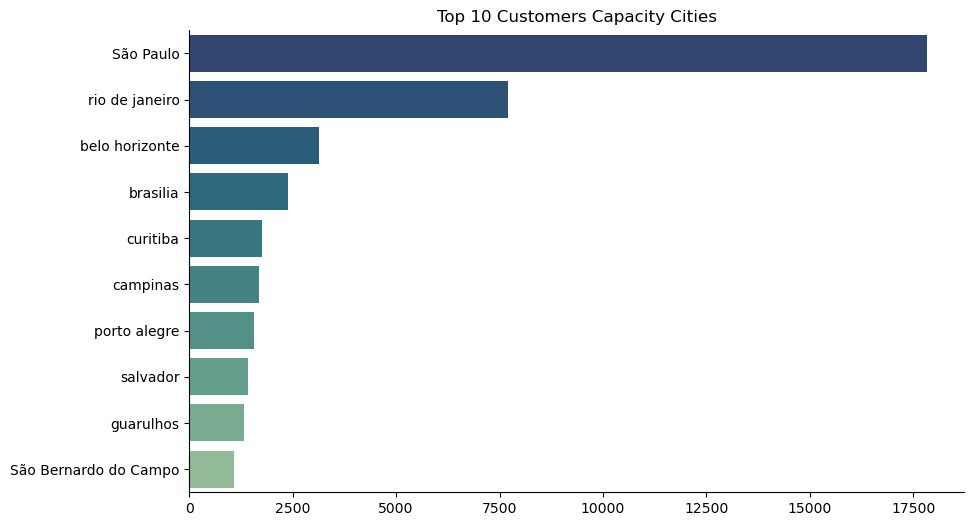

In [25]:
# EDA
# Top 10 Customers Capacity Cities

plt.figure(figsize=[10, 6])
sns.barplot(x = df_cus_seg.customer_city.value_counts().values[:10], 
            y = df_cus_seg.customer_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity Cities')
sns.despine()

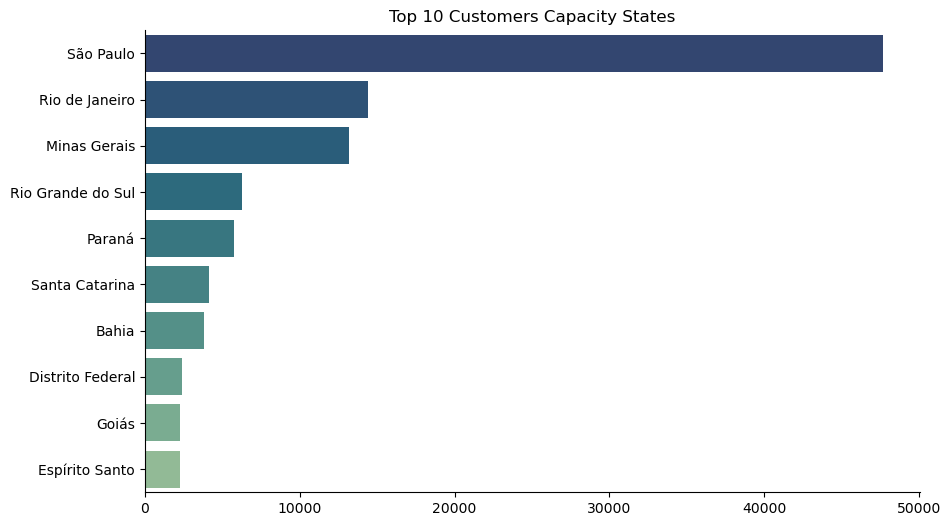

In [26]:
# Top 10 Customers Capacity States

plt.figure(figsize=[10, 6])
sns.barplot(x = df_cus_seg.customer_state.value_counts().values[:10], 
            y = df_cus_seg.customer_state.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity States')
sns.despine()

In [27]:
# Order Status
df_cus_seg.order_status.value_counts()

delivered    112549
canceled          7
Name: order_status, dtype: int64

In [28]:
# Due to the Extreme imbalance and lack of variance in the feature, we should drop it
df_cus_seg.drop('order_status', axis=1, inplace=True)

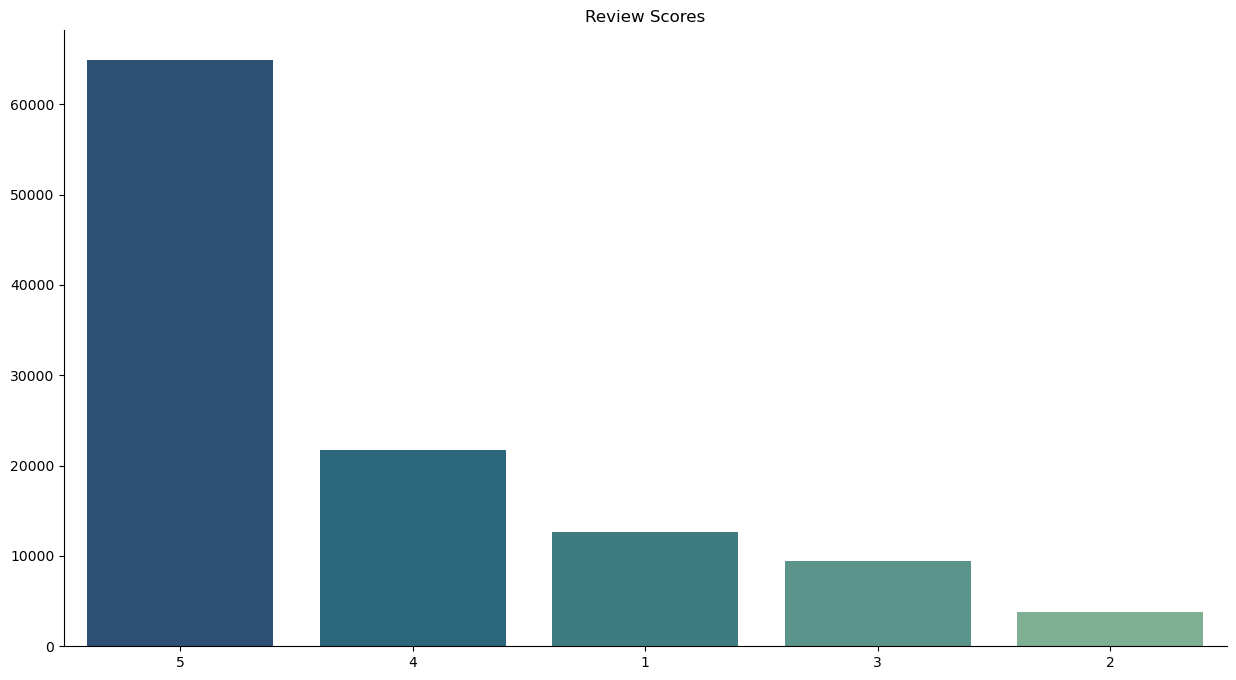

In [29]:
# Review Score
plt.figure(figsize=[15, 8])
review_score_index = [str(i) for i in 
                      df_cus_seg.review_score.value_counts().index]
sns.barplot(x = review_score_index, 
            y= df_cus_seg.review_score.value_counts().values, 
            palette= 'crest_r')
plt.title('Review Scores')
sns.despine()

In [30]:
# Price
plt.figure(figsize=[10, 6])
sns.set_palette('crest_r')
sns.distplot(x = df_cus_seg.price)
plt.title('Price Distribution')
sns.despine()

In [31]:
# Freight Value 
plt.figure(figsize=[10, 6])
sns.set_palette('crest_r')
sns.distplot(x = df_cus_seg.freight_value)
plt.title('Freight Value Distribution')
sns.despine()

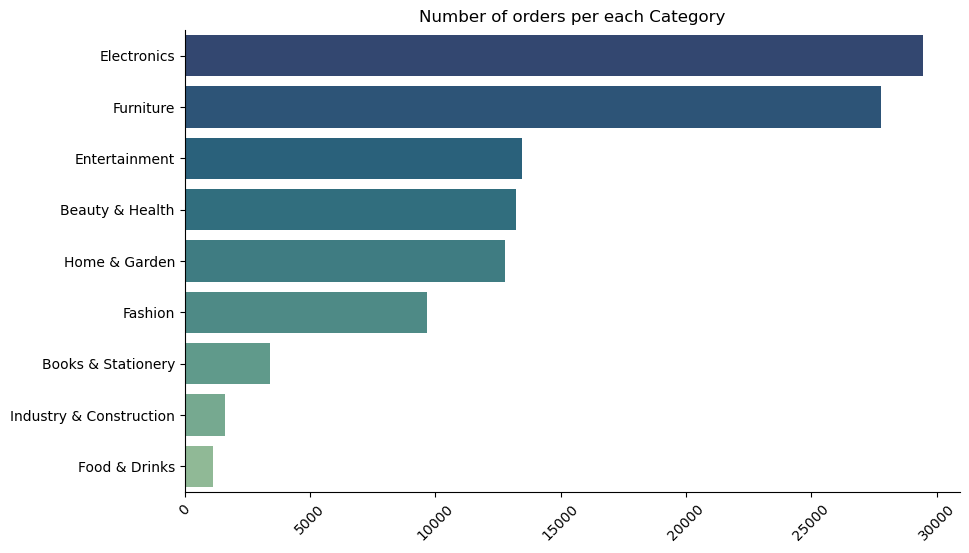

In [32]:
# Number of orders per each Category
plt.figure(figsize=[10, 6])
sns.barplot(x = df_cus_seg.product_category.value_counts().values, 
            y = df_cus_seg.product_category.value_counts().index, palette= 'crest_r')
plt.title('Number of orders per each Category')
plt.xticks(rotation = 45)
sns.despine()

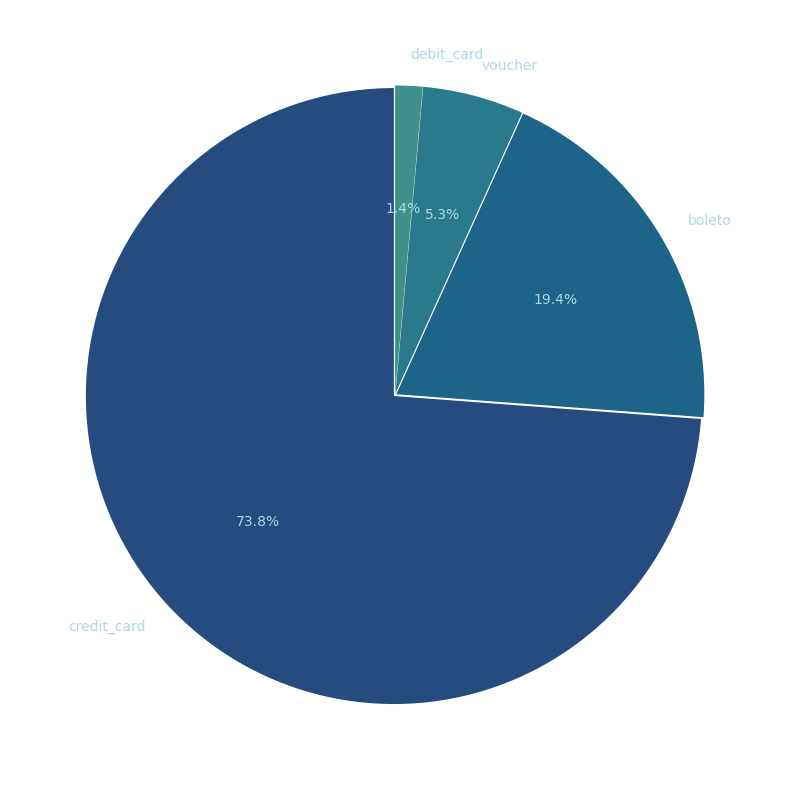

In [33]:
# payment type
plt.figure(figsize=[10, 10])
plt.pie(df_cus_seg.payment_type.value_counts().values, 
        explode=(0.005, 0.005, 0.005, 0.005), 
        labels= df_cus_seg.payment_type.value_counts().index, 
        autopct='%1.1f%%',shadow=False, startangle=90, textprops={'color':"lightblue"});

In [34]:
# Payment Installments
df_cus_seg.payment_installments.value_counts()

1     56134
2     13094
3     11257
4      7635
10     6575
5      5779
8      4845
6      4418
7      1721
9       685
12      157
15       85
18       38
24       34
11       22
20       19
13       18
14       15
17        7
16        7
21        6
0         3
23        1
22        1
Name: payment_installments, dtype: int64

In [35]:
installment0 = df_cus_seg[df_cus_seg.payment_installments == 0]
installment0

customer_id                customer_unique_id  \
55124  48ebb06cf56dba9d009230cc751bb195  9925e1d7dff0d807355599dee04830ab   
55125  48ebb06cf56dba9d009230cc751bb195  9925e1d7dff0d807355599dee04830ab   
89716  5e5794daaa13f73e2f1cdb4114529843  f54cea27c80dc09bfe07b1cf1e01b845   

       customer_zip_code_prefix     customer_city customer_state  \
55124                     44001  feira de santana          Bahia   
55125                     44001  feira de santana          Bahia   
89716                      5263         São Paulo      São Paulo   

                               order_id order_purchase_timestamp  \
55124  1a57108394169c0b47d8f876acc9ba2d      2018-05-15 16:25:14   
55125  1a57108394169c0b47d8f876acc9ba2d      2018-05-15 16:25:14   
89716  744bade1fcf9ff3f31d860ace076d422      2018-04-22 11:34:42   

         order_approved_at order_delivered_carrier_date  \
55124  2018-05-15 16:36:52          2018-05-17 12:37:00   
55125  2018-05-15 16:36:52          2018-05-17 12:37:00   
89716  2018-04-24 19:04:46          2018-04-24 03:14:34   

      order_delivered_customer_date  ...  seller_state product_category  \
55124           2018-05-24 15:45:41  ...  Minas Gerais    Home & Garden   
55125           2018-05-24 15:45:41  ...  Minas Gerais    Home & Garden   
89716           2018-04-27 20:55:28  ...     São Paulo      Electronics   

       estimated_days arrival_days shipping_days  seller_to_carrier_status  \
55124              22            9             7              OnTime/Early   
55125              22            9             7              OnTime/Early   
89716              24            5             3              OnTime/Early   

      arrival_status estimated_delivery_rate arrival_delivery_rate  \
55124   OnTime/Early                 Neutral                  Fast   
55125   OnTime/Early                 Neutral                  Fast   
89716   OnTime/Early                 Neutral             Very Fast   

       shipping_delivery_rate  
55124               Very Fast  
55125               Very Fast  
89716               Very Fast  

[3 rows x 41 columns]

In [36]:
# Number of installments can't be 0, so drop these rows
# Drop rows based on index
df_cus_seg.drop(installment0.index, inplace=True)

# Reset Index
df_cus_seg.reset_index(inplace= True, drop= True) 

In [37]:
plt.figure(figsize=[10, 6])
sns.countplot(x = df_cus_seg.payment_installments, palette= 'crest_r')
plt.title('Installments Distribution')
sns.despine()

In [38]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df_cus_seg.payment_value)
plt.title('Payment Value')
sns.despine()

In [39]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df_cus_seg.seller_city.value_counts().values[:10], 
            y= df_cus_seg.seller_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Sellers Cities')
sns.despine()

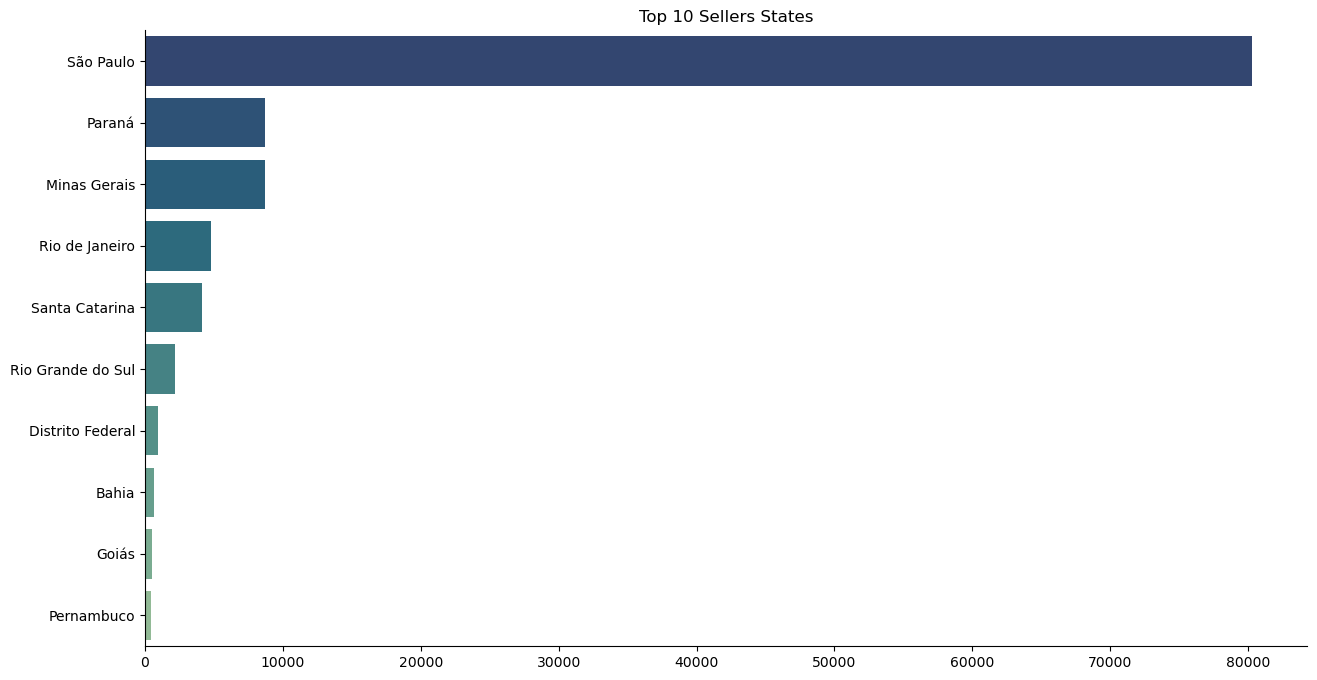

In [40]:
plt.figure(figsize=[15, 8])
sns.barplot(x = df_cus_seg.seller_state.value_counts().values[:10],
            y= df_cus_seg.seller_state.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Sellers States')
sns.despine()

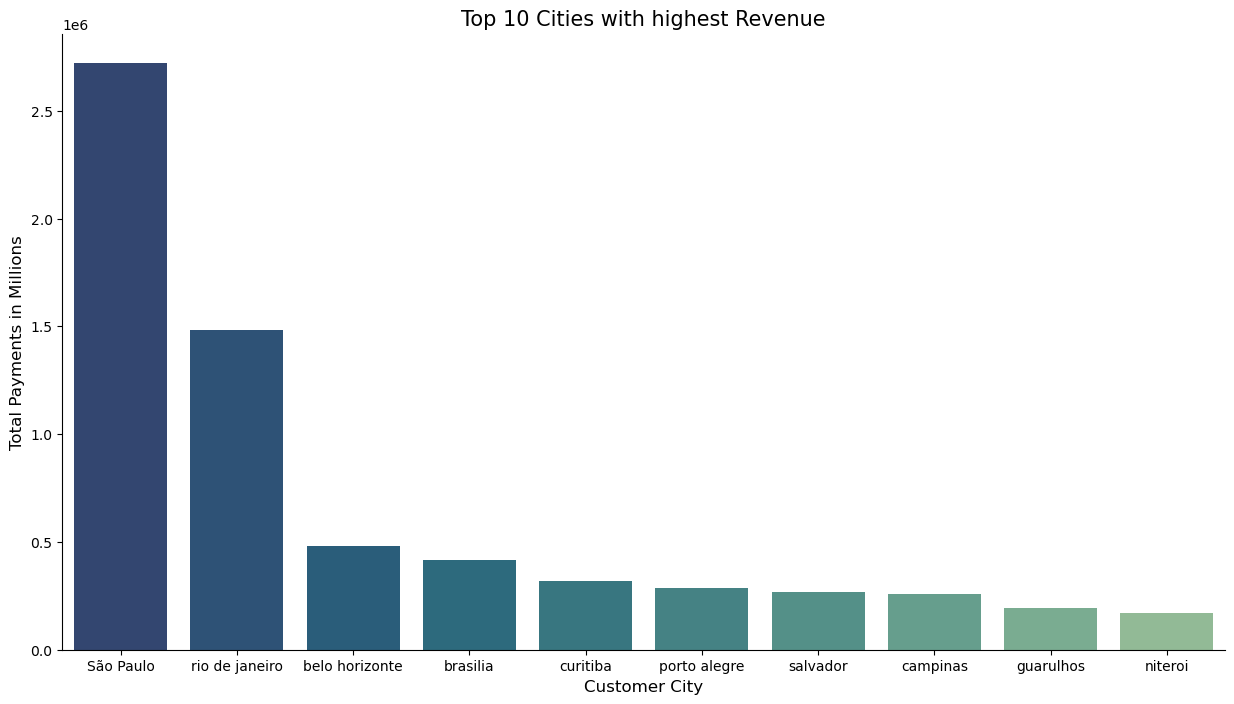

In [41]:
# Which Cities have highest Revenue?
# Group customer city by payment value
revenue_per_city = df_cus_seg.groupby('customer_city')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
revenue_per_city.reset_index(inplace=True)

# plot Top 10 cities with highest revenue
plt.figure(figsize=[15, 8])
sns.barplot(x = revenue_per_city.customer_city[:10], y= revenue_per_city.payment_value[:10], palette= 'crest_r')
plt.title('Top 10 Cities with highest Revenue', fontsize= 15)
plt.xlabel('Customer City', fontsize= 12)
plt.ylabel('Total Payments in Millions',fontsize= 12)
sns.despine()

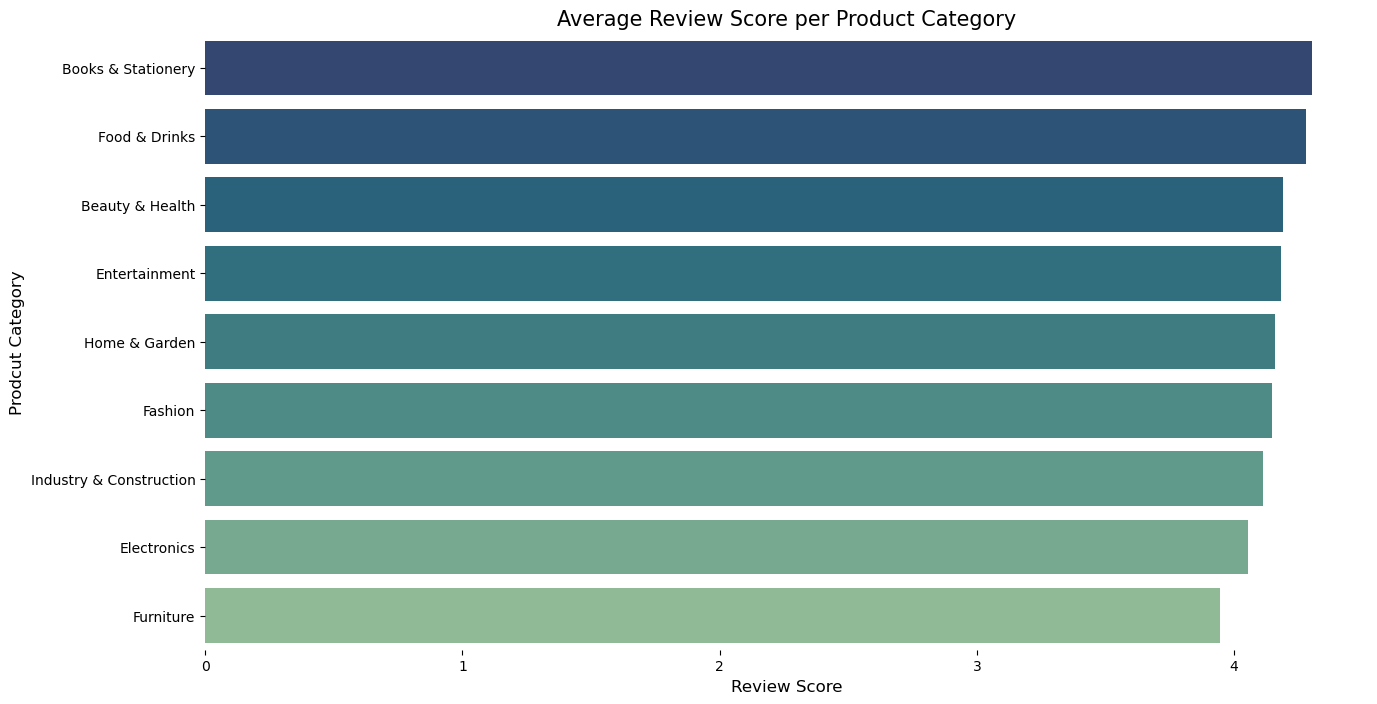

In [42]:
# What is the average review score for each product category ?
# Filter product category with 4.5 or above
review_per_cat = df_cus_seg.groupby('product_category')[['review_score']].mean().sort_values(by='review_score', ascending=False)
review_per_cat.reset_index(inplace=True)

# Plot Product Category vs Review Score
plt.figure(figsize=[15, 8])
sns.barplot(x = review_per_cat.review_score, y= review_per_cat.product_category, palette= 'crest_r')
plt.title('Average Review Score per Product Category', fontsize= 15)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Prodcut Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

In [43]:
# Are customers more likely to make larger payments using certain payment methods ?
# Group each payment type by average payment value
payment_methods = df_cus_seg.groupby('payment_type')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
plt.figure(figsize=[15, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')
plt.title('Total Revenue per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Revenue per Payment type (Millions)', fontsize= 12)
sns.despine()

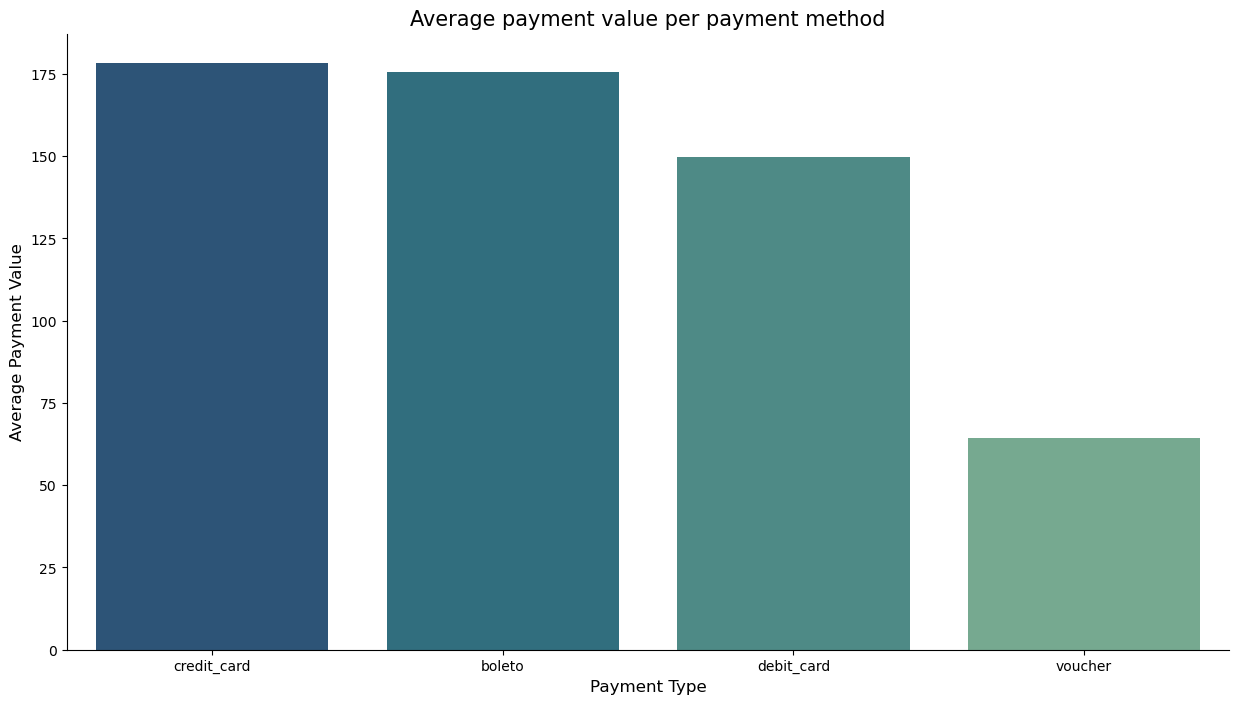

In [44]:
# Group each payment type by average payment value
payment_methods = df_cus_seg.groupby('payment_type')[['payment_value']].mean().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
plt.figure(figsize=[15, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')
plt.title('Average payment value per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Average Payment Value', fontsize= 12)
sns.despine()

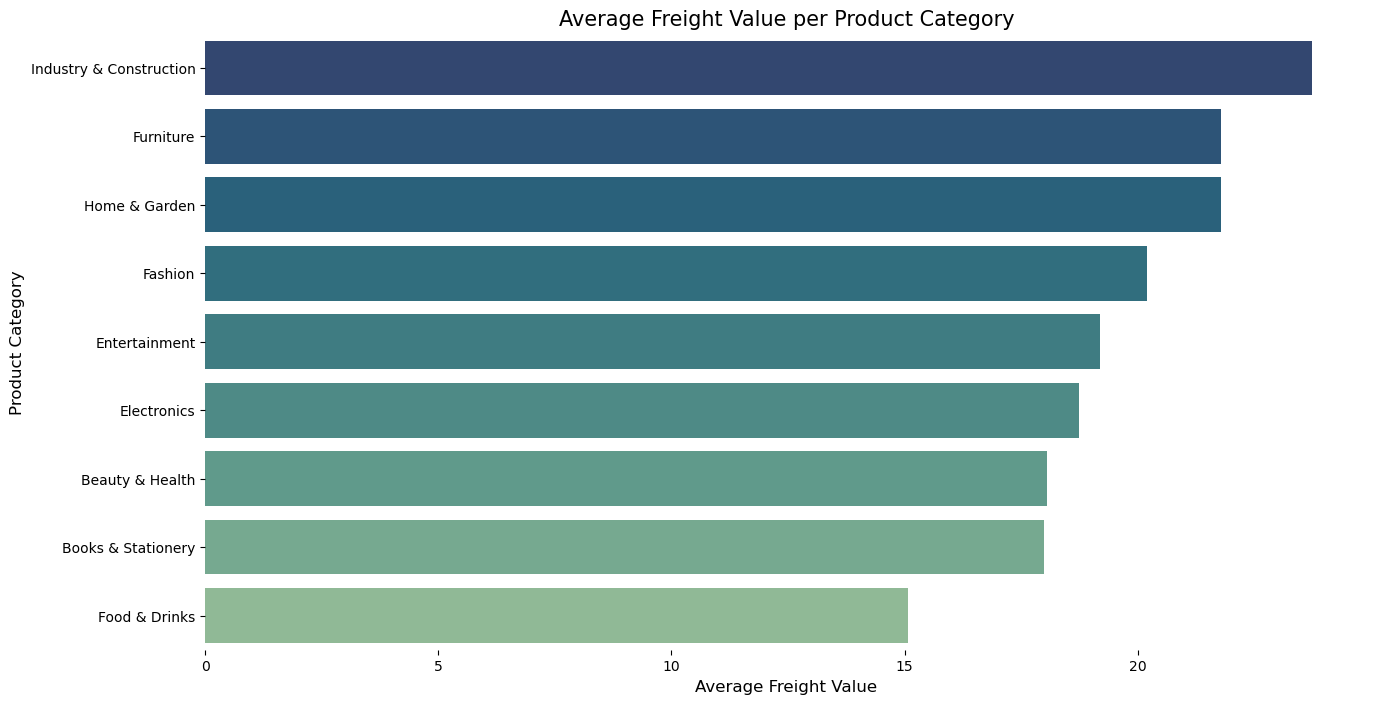

In [45]:
# What is the average freight value for each product category?
# Group product category by average freight value
freight_per_cat = df_cus_seg.groupby('product_category')[['freight_value']].mean().sort_values(by='freight_value', ascending=False)
freight_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[15, 8])
sns.barplot(x = freight_per_cat.freight_value, y=  freight_per_cat.product_category, palette= 'crest_r')
plt.title('Average Freight Value per Product Category', fontsize= 15)
plt.xlabel('Average Freight Value',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

In [46]:
# What is the average shipping time for each product Category?
# Group product category by average arrival time
ship_per_cat = df_cus_seg.groupby('product_category')[['arrival_days']].mean().sort_values(by='arrival_days', ascending=False)
ship_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[15, 8])
sns.barplot(x = ship_per_cat.arrival_days, y=  ship_per_cat.product_category, palette= 'crest_r')
plt.title('Average arrival Time per Product Category', fontsize= 15)
plt.xlabel('Average arrival time (days)',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

<AxesSubplot:xlabel='review_score', ylabel='count'>

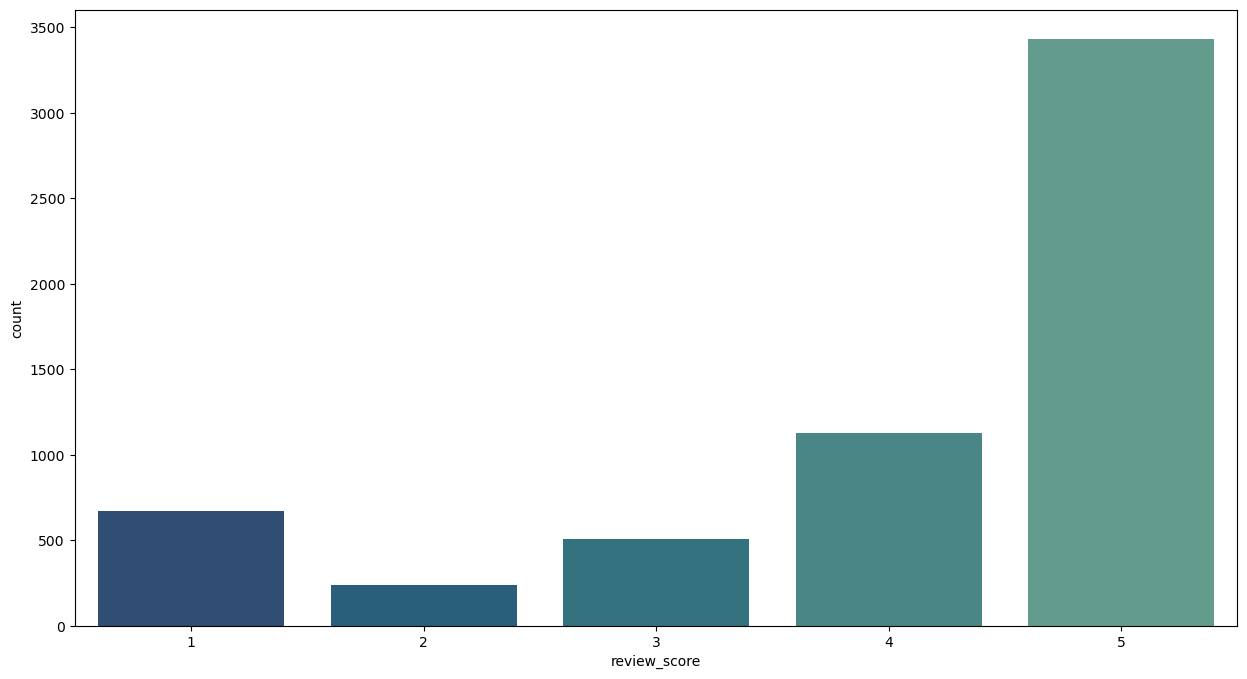

In [47]:
# Are Transactions done with Vouchers lead to high review score?
plt.figure(figsize=[15, 8])
voucher_trans = df_cus_seg[df_cus_seg.payment_type == 'voucher']
sns.countplot(x= voucher_trans.review_score)

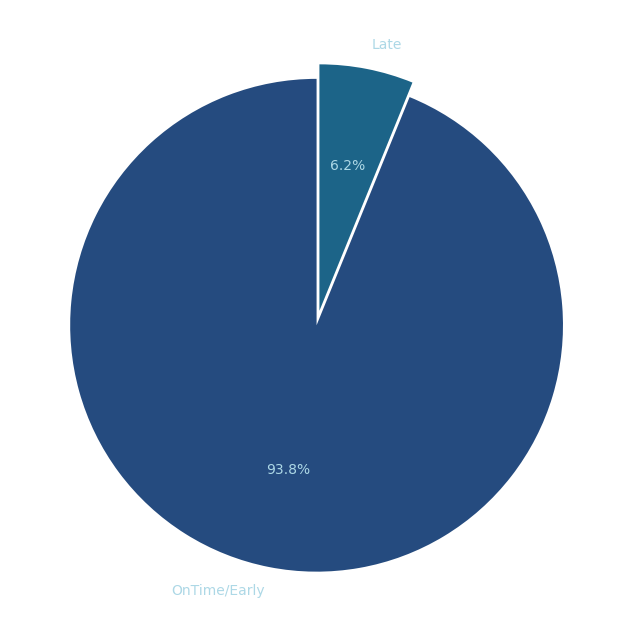

In [48]:
# How accurate are the estimated delivery dates provided to customers?
plt.figure(figsize=[30,8])
Values = df_cus_seg.arrival_status.value_counts().values
Labels = df_cus_seg.arrival_status.value_counts().index
plt.pie(Values, explode=(0.03, 0.03), labels= ['OnTime/Early', 'Late'], 
        autopct='%1.1f%%', shadow=False, startangle=90, 
        textprops={'color':"lightblue"});

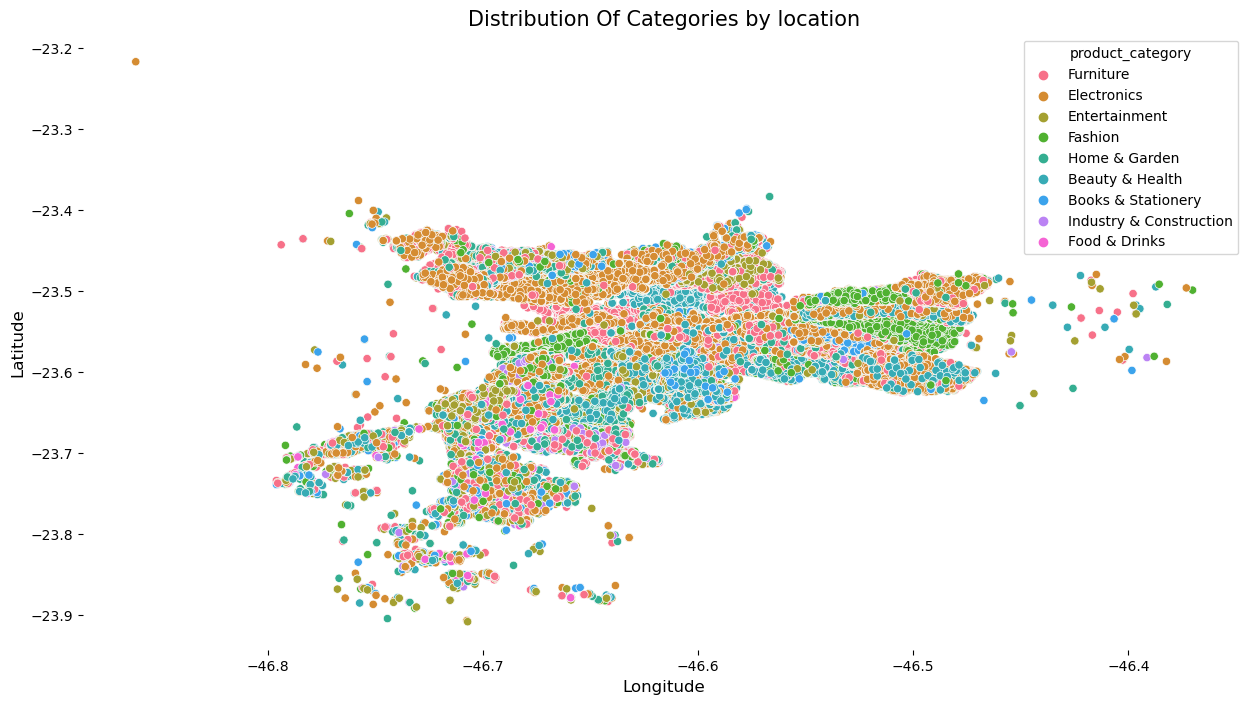

In [49]:

# Distribution of products categories by location
plt.figure(figsize=[15, 8])
sns.scatterplot(x = geolocation.geolocation_lng, 
                y = geolocation.geolocation_lat, 
                hue= df_cus_seg.product_category)
plt.title('Distribution Of Categories by location', fontsize= 15)
plt.xlabel('Longitude',fontsize= 12)
plt.ylabel('Latitude', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);sns.despine()

In [50]:
df_segmentation = df_cus_seg.copy() # use to apply k-mean clustering model

In [51]:
# Data Preprocessing

In [52]:
# Drop Unneccessary Features
# Drop all ids, zip codes, datetimes, review comment and title, product length

df_cus_seg.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 
                 'order_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_id', 
                 'review_creation_date', 'review_answer_timestamp', 'order_item_id', 
                 'product_id', 'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 
                 'shipping_limit_date', 'product_category', 'product_category_name' ], axis= 1, inplace= True)

<AxesSubplot:>

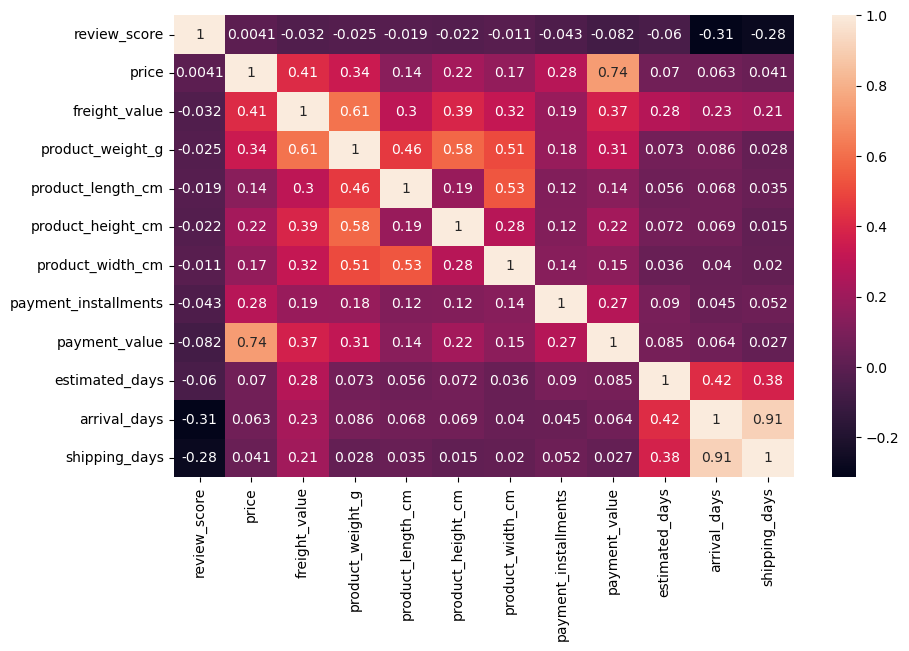

In [53]:
# Show Correlation between Features
plt.figure(figsize= [10, 6])
sns.heatmap(df_cus_seg.corr(), annot= True)

In [54]:
# Remove features with high correlations
df_cus_seg.drop(['shipping_days', 'price'], axis= 1, inplace= True)

In [55]:
df_cus_seg.head()

review_score  freight_value  product_weight_g  product_length_cm  \
0             4          21.88            8683.0               54.0   
1             1          24.90            8683.0               54.0   
2             1          24.90            8683.0               54.0   
3             3          15.62            8683.0               54.0   
4             4          30.59            8683.0               54.0   

   product_height_cm  product_width_cm payment_type  payment_installments  \
0               64.0              31.0  credit_card                     2   
1               64.0              31.0  credit_card                     1   
2               64.0              31.0  credit_card                     1   
3               64.0              31.0  credit_card                     7   
4               64.0              31.0  credit_card                    10   

   payment_value  estimated_days  arrival_days seller_to_carrier_status  \
0         146.87              20             9                     Late   
1         275.79              40            19             OnTime/Early   
2         275.79              40            19             OnTime/Early   
3         140.61              36            19             OnTime/Early   
4         137.58              47            25                     Late   

  arrival_status estimated_delivery_rate arrival_delivery_rate  \
0   OnTime/Early                 Neutral                  Fast   
1   OnTime/Early               Very Slow               Neutral   
2   OnTime/Early               Very Slow               Neutral   
3   OnTime/Early                    Slow               Neutral   
4   OnTime/Early               Very Slow                  Slow   

  shipping_delivery_rate  
0              Very Fast  
1              Very Fast  
2              Very Fast  
3              Very Fast  
4                   Fast

In [56]:
# Convert Review Score from Multiclass to Binary
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied', 
                  3 : 'Not Satisfied', 
                  4 : 'Satisfied', 
                  5 : 'Satisfied'}

df_cus_seg['review_score'] = df_cus_seg['review_score'].map(encoded_class)

In [57]:
# Split Data into Input Features & Target Variable
X = df_cus_seg.drop('review_score', axis=1)
y = df_cus_seg['review_score']

In [58]:
# Handling Categorical Features
# Handling Ordinal Features ( Label Encoding)
labels = {'Very Slow' : 1, 
          'Slow' : 2, 
          'Neutral' : 3, 
          'Fast' : 4, 
          'Very Fast' : 5}

X.estimated_delivery_rate = X.estimated_delivery_rate.map(labels)
X.shipping_delivery_rate = X.shipping_delivery_rate.map(labels)
X.arrival_delivery_rate = X.arrival_delivery_rate.map(labels)

In [59]:
# Handling Nominal Features ( One Hot Encoding )
X = pd.get_dummies(X, drop_first=True)

In [60]:
# Split Data into Train & Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify= y)

In [61]:
# Feature Selection

from sklearn.feature_selection import mutual_info_classif, SelectKBest
fs = SelectKBest(mutual_info_classif, k= 'all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

<AxesSubplot:>

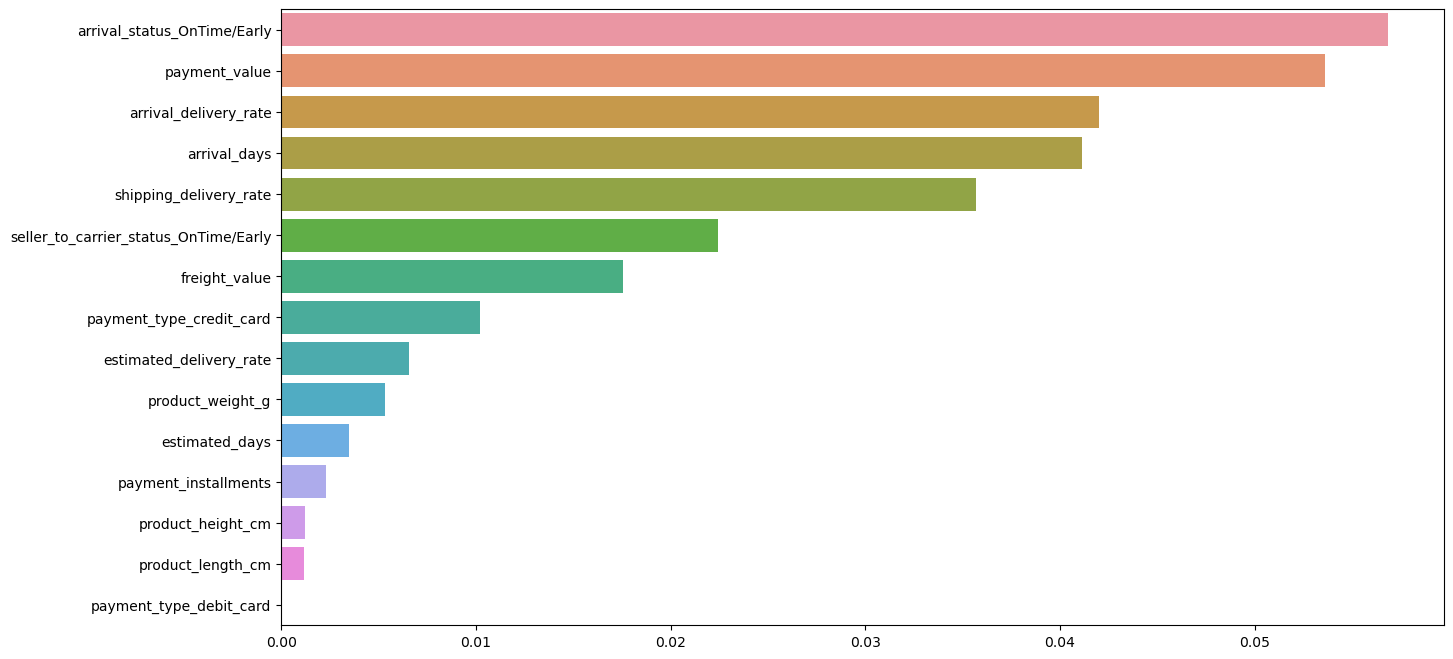

In [62]:
# Plotting Features as per importance

# Get the indices sorted by most important to least important
plt.figure(figsize=[15, 8])
indices = np.argsort(fs.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(15):
    features.append(fs.feature_names_in_[indices[i]])

# Now plot
sns.barplot(x = fs.scores_[indices[range(15)]], y = features)

In [63]:
# Select best 9 Features
from sklearn.feature_selection import mutual_info_classif, SelectKBest
fs = SelectKBest(mutual_info_classif, k= 9)
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [64]:
x_train_fs = pd.DataFrame(x_train_fs, columns= fs.get_feature_names_out())
x_test_fs = pd.DataFrame(x_test_fs, columns= fs.get_feature_names_out())

In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean= False)
x_train_scaled = sc.fit_transform(x_train_fs)
x_test_scaled = sc.transform(x_test_fs)

In [66]:
# Convert Array to Dataframe
x_train_scaled = pd.DataFrame(x_train_scaled, columns= sc.get_feature_names_out())
x_test_scaled = pd.DataFrame(x_test_scaled, columns= sc.get_feature_names_out())

In [67]:
# Handling Imbalance

In [68]:
# Check imbalance percentage
round((y_train.value_counts() / y_train.shape[0]) * 100, 2)

Satisfied        76.99
Not Satisfied    23.01
Name: review_score, dtype: float64

In [69]:
# Use SMOTE for handling imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [70]:
# Modeling
# Apply ML Models

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.70      0.42      0.53     69319
    Satisfied       0.59      0.81      0.68     69319

     accuracy                           0.62    138638
    macro avg       0.64      0.62      0.60    138638
 weighted avg       0.64      0.62      0.60    138638

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.39      0.41      0.40      5181
    Satisfied       0.82      0.81      0.82     17330

     accuracy                           0.72     22511
    macro avg       0.61      0.61      0.61     22511
 weighted avg       0.72      0.72      0.72     22511



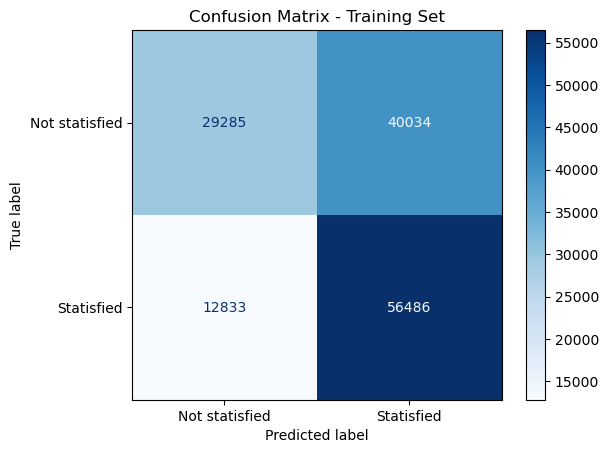

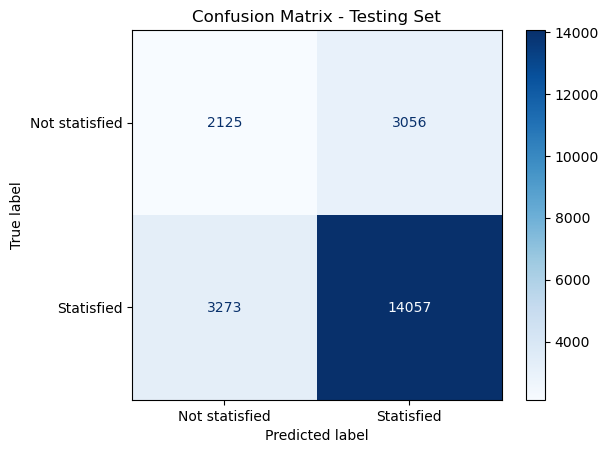

In [71]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

lr = LogisticRegression()
lr.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, lr.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, lr.predict(x_test_scaled)))

# Get confusion matrix for training set
cm_train = confusion_matrix(y_train_resampled, lr.predict(x_train_resampled))

# Get confusion matrix for testing set
cm_test = confusion_matrix(y_test, lr.predict(x_test_scaled))

# Plot confusion matrix for training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not statisfied', 'Statisfied'])
disp_train.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Plot confusion matrix for testing set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not statisfied', 'Statisfied'])
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Testing Set')
plt.show()

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.82      0.90      0.86     69319
    Satisfied       0.89      0.80      0.84     69319

     accuracy                           0.85    138638
    macro avg       0.85      0.85      0.85    138638
 weighted avg       0.85      0.85      0.85    138638

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.38      0.59      0.46      5181
    Satisfied       0.85      0.71      0.78     17330

     accuracy                           0.68     22511
    macro avg       0.62      0.65      0.62     22511
 weighted avg       0.74      0.68      0.70     22511



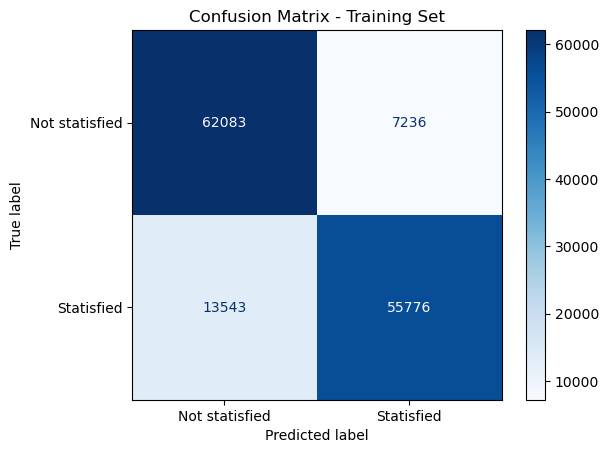

In [72]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, knn.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, knn.predict(x_test_scaled)))

# Get confusion matrix for training set
cm_train = confusion_matrix(y_train_resampled, knn.predict(x_train_resampled))

# Get confusion matrix for testing set
cm_test = confusion_matrix(y_test, knn.predict(x_test_scaled))

# Plot confusion matrix for training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not statisfied', 'Statisfied'])
disp_train.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Plot confusion matrix for testing set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not statisfied', 'Statisfied'])
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Testing Set')
plt.show()

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.99      1.00      0.99     69319
    Satisfied       1.00      0.99      0.99     69319

     accuracy                           0.99    138638
    macro avg       0.99      0.99      0.99    138638
 weighted avg       0.99      0.99      0.99    138638

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.43      0.56      0.49      5181
    Satisfied       0.86      0.78      0.81     17330

     accuracy                           0.73     22511
    macro avg       0.64      0.67      0.65     22511
 weighted avg       0.76      0.73      0.74     22511



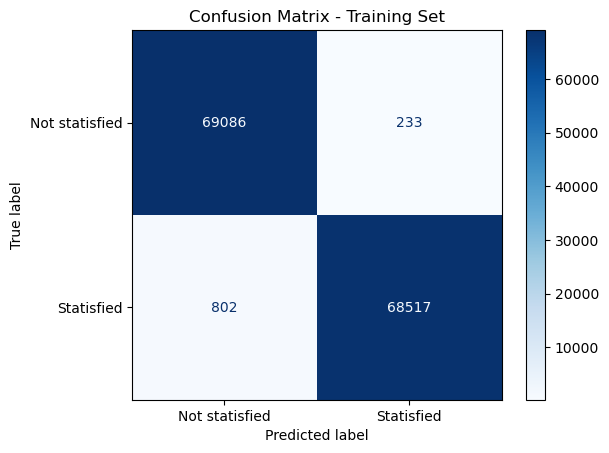

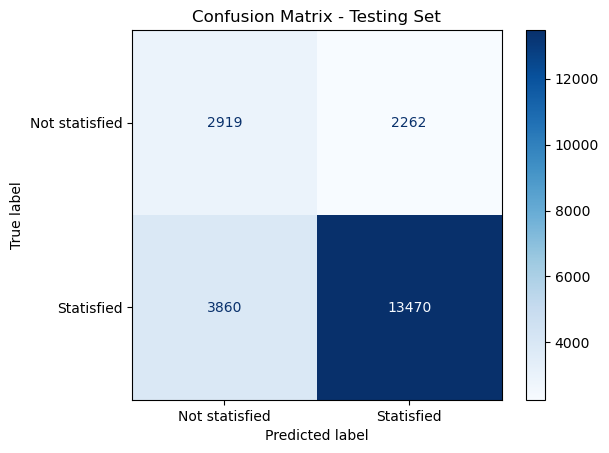

In [73]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, dt.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, dt.predict(x_test_scaled)))

# Get confusion matrix for training set
cm_train = confusion_matrix(y_train_resampled, dt.predict(x_train_resampled))

# Get confusion matrix for testing set
cm_test = confusion_matrix(y_test, dt.predict(x_test_scaled))

# Plot confusion matrix for training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not statisfied', 'Statisfied'])
disp_train.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Plot confusion matrix for testing set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not statisfied', 'Statisfied'])
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Testing Set')
plt.show()

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.99      0.99      0.99     69319
    Satisfied       0.99      0.99      0.99     69319

     accuracy                           0.99    138638
    macro avg       0.99      0.99      0.99    138638
 weighted avg       0.99      0.99      0.99    138638

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.52      0.54      0.53      5181
    Satisfied       0.86      0.85      0.86     17330

     accuracy                           0.78     22511
    macro avg       0.69      0.69      0.69     22511
 weighted avg       0.78      0.78      0.78     22511



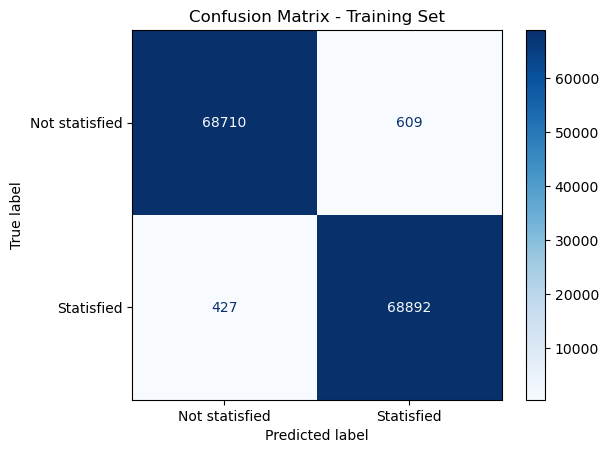

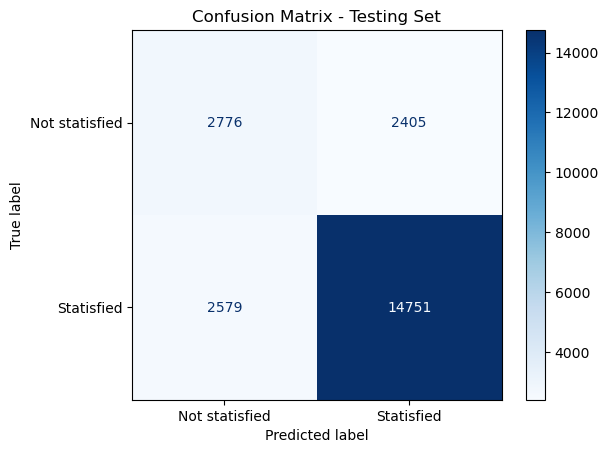

In [74]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, rf.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, rf.predict(x_test_scaled)))

# Get confusion matrix for training set
cm_train = confusion_matrix(y_train_resampled, rf.predict(x_train_resampled))

# Get confusion matrix for testing set
cm_test = confusion_matrix(y_test, rf.predict(x_test_scaled))

# Plot confusion matrix for training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not statisfied', 'Statisfied'])
disp_train.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Plot confusion matrix for testing set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not statisfied', 'Statisfied'])
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Testing Set')
plt.show()

In [75]:
#  XGboost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Label encode the target variables
le = LabelEncoder()
y_train_xg = le.fit_transform(y_train_resampled)
y_test_xg = le.fit_transform(y_test)

# Train XGBoost model
xg = XGBClassifier()
xg.fit(x_train_resampled, y_train_xg)

# Evaluate on training set
print('Evaluation on Training \n', classification_report(y_train_xg, xg.predict(x_train_resampled)))

# Evaluate on testing set
print('Evaluation on Testing \n', classification_report(y_test_xg, xg.predict(x_test_scaled)))

# Get confusion matrix for training set
cm_train = confusion_matrix(y_train_xg, xg.predict(x_train_resampled))

# Get confusion matrix for testing set
cm_test = confusion_matrix(y_test_xg, xg.predict(x_test_scaled))

# Plot confusion matrix for training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Satisfied', 'Satisfied'])
disp_train.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Plot confusion matrix for testing set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Satisfied', 'Satisfied'])
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Testing Set')
plt.show()

Evaluation on Training 
               precision    recall  f1-score   support

           0       0.82      0.61      0.70     69319
           1       0.69      0.87      0.77     69319

    accuracy                           0.74    138638
   macro avg       0.75      0.74      0.73    138638
weighted avg       0.75      0.74      0.73    138638

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.45      0.43      0.44      5181
           1       0.83      0.84      0.84     17330

    accuracy                           0.75     22511
   macro avg       0.64      0.63      0.64     22511
weighted avg       0.74      0.75      0.74     22511



In [76]:
# Hyperparameter Tuning

# XGboost
# Create an instance of XGBClassifier with specified hyperparameters
final_xg_model = XGBClassifier(learning_rate=0.2, max_depth=8, n_estimators=200)

# Train the XGBoost model on the resampled training data
final_xg_model.fit(x_train_resampled, y_train_xg)

# Evaluate the performance of the trained model on the training set
print('Evaluation on Training \n', classification_report(y_train_xg, final_xg_model.predict(x_train_resampled)))

# Evaluate the performance of the trained model on the testing set
print('Evaluation on Testing \n', classification_report(y_test_xg, final_xg_model.predict(x_test_scaled)))


Evaluation on Training 
               precision    recall  f1-score   support

           0       0.88      0.72      0.79     69319
           1       0.76      0.90      0.83     69319

    accuracy                           0.81    138638
   macro avg       0.82      0.81      0.81    138638
weighted avg       0.82      0.81      0.81    138638

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.47      0.46      0.47      5181
           1       0.84      0.85      0.84     17330

    accuracy                           0.76     22511
   macro avg       0.66      0.65      0.66     22511
weighted avg       0.76      0.76      0.76     22511



In [77]:
import catboost as cb
final_cb_model = cb.CatBoostClassifier(depth= 7, iterations= 200, learning_rate= 0.2)
final_cb_model.fit(x_train_resampled,y_train_resampled)
print('Evaluation on Training \n', classification_report(y_train_resampled, final_cb_model.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, final_cb_model.predict(x_test_scaled)))

0:	learn: 0.6684979	total: 166ms	remaining: 33s
1:	learn: 0.6507362	total: 190ms	remaining: 18.8s
2:	learn: 0.6401140	total: 216ms	remaining: 14.2s
3:	learn: 0.6339570	total: 242ms	remaining: 11.9s
4:	learn: 0.6290530	total: 267ms	remaining: 10.4s
5:	learn: 0.6241992	total: 293ms	remaining: 9.47s
6:	learn: 0.6219654	total: 321ms	remaining: 8.85s
7:	learn: 0.6188621	total: 350ms	remaining: 8.41s
8:	learn: 0.6143841	total: 383ms	remaining: 8.12s
9:	learn: 0.6125254	total: 415ms	remaining: 7.88s
10:	learn: 0.6094492	total: 452ms	remaining: 7.77s
11:	learn: 0.6058899	total: 481ms	remaining: 7.54s
12:	learn: 0.6040216	total: 512ms	remaining: 7.36s
13:	learn: 0.6011493	total: 544ms	remaining: 7.22s
14:	learn: 0.5985441	total: 573ms	remaining: 7.07s
15:	learn: 0.5972874	total: 606ms	remaining: 6.97s
16:	learn: 0.5945127	total: 641ms	remaining: 6.9s
17:	learn: 0.5937226	total: 674ms	remaining: 6.82s
18:	learn: 0.5923503	total: 705ms	remaining: 6.72s
19:	learn: 0.5912375	total: 740ms	remaining:

163:	learn: 0.5209006	total: 5.78s	remaining: 1.27s
164:	learn: 0.5206918	total: 5.81s	remaining: 1.23s
165:	learn: 0.5204828	total: 5.85s	remaining: 1.2s
166:	learn: 0.5202461	total: 5.88s	remaining: 1.16s
167:	learn: 0.5200942	total: 5.92s	remaining: 1.13s
168:	learn: 0.5199164	total: 5.95s	remaining: 1.09s
169:	learn: 0.5197003	total: 6s	remaining: 1.06s
170:	learn: 0.5194028	total: 6.03s	remaining: 1.02s
171:	learn: 0.5191777	total: 6.07s	remaining: 988ms
172:	learn: 0.5188915	total: 6.1s	remaining: 953ms
173:	learn: 0.5186848	total: 6.14s	remaining: 917ms
174:	learn: 0.5184675	total: 6.17s	remaining: 882ms
175:	learn: 0.5182538	total: 6.21s	remaining: 846ms
176:	learn: 0.5180025	total: 6.25s	remaining: 812ms
177:	learn: 0.5178135	total: 6.28s	remaining: 776ms
178:	learn: 0.5175676	total: 6.32s	remaining: 741ms
179:	learn: 0.5174206	total: 6.36s	remaining: 706ms
180:	learn: 0.5172157	total: 6.39s	remaining: 671ms
181:	learn: 0.5169241	total: 6.43s	remaining: 636ms
182:	learn: 0.516

In [78]:
# RandomForest
final_rf_model = RandomForestClassifier(n_estimators= 200, max_depth= 10)
final_rf_model.fit(x_train_resampled,y_train_resampled)
print('Evaluation on Training \n', classification_report(y_train_resampled, final_rf_model.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, final_rf_model.predict(x_test_scaled)))

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.77      0.51      0.61     69319
    Satisfied       0.63      0.85      0.73     69319

     accuracy                           0.68    138638
    macro avg       0.70      0.68      0.67    138638
 weighted avg       0.70      0.68      0.67    138638

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.43      0.42      0.42      5181
    Satisfied       0.83      0.83      0.83     17330

     accuracy                           0.74     22511
    macro avg       0.63      0.63      0.63     22511
 weighted avg       0.74      0.74      0.74     22511



In [79]:
# XGboost is selected for pipeline as it provides highest performance on testing

In [80]:
df_cus_seg.columns

Index(['review_score', 'freight_value', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_type', 'payment_installments', 'payment_value',
       'estimated_days', 'arrival_days', 'seller_to_carrier_status',
       'arrival_status', 'estimated_delivery_rate', 'arrival_delivery_rate',
       'shipping_delivery_rate'],
      dtype='object')

In [81]:
# Customer segmentation
# Get last transaction date to help calculate Recency
max_trans_date = max(df_segmentation.order_purchase_timestamp).date()
max_trans_date

datetime.date(2018, 8, 29)

In [82]:
# Create Recency, Frequancy and Monetary Features
from datetime import datetime 

rfm_table = df_segmentation.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x:(datetime.strptime(str(max_trans_date),'%Y-%m-%d') - x.max()).days,
                                                                'order_id': lambda x:len(x),
                                                             'payment_value': lambda x:sum(x)})
rfm_table

order_purchase_timestamp  order_id  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2                       110         1   
0000b849f77a49e4a4ce2b2a4ca5be3f                       113         1   
0000f46a3911fa3c0805444483337064                       536         1   
0000f6ccb0745a6a4b88665a16c9f078                       320         1   
0004aac84e0df4da2b147fca70cf8255                       287         1   
...                                                    ...       ...   
fffcf5a5ff07b0908bd4e2dbc735a684                       446         2   
fffea47cd6d3cc0a88bd621562a9d061                       261         1   
ffff371b4d645b6ecea244b27531430a                       567         1   
ffff5962728ec6157033ef9805bacc48                       118         1   
ffffd2657e2aad2907e67c3e9daecbeb                       483         1   

                                  payment_value  
customer_unique_id                               
0000366f3b9a7992bf8c76cfdf3221e2         141.90  
0000b849f77a49e4a4ce2b2a4ca5be3f          27.19  
0000f46a3911fa3c0805444483337064          86.22  
0000f6ccb0745a6a4b88665a16c9f078          43.62  
0004aac84e0df4da2b147fca70cf8255         196.89  
...                                         ...  
fffcf5a5ff07b0908bd4e2dbc735a684        4134.84  
fffea47cd6d3cc0a88bd621562a9d061          84.58  
ffff371b4d645b6ecea244b27531430a         112.46  
ffff5962728ec6157033ef9805bacc48         133.69  
ffffd2657e2aad2907e67c3e9daecbeb          71.56  

[90986 rows x 3 columns]

In [83]:
# Rename columns
rfm_table.rename(columns={'order_purchase_timestamp':'Recency','order_id':'Frequancy','payment_value':'Monetary'}, inplace=True)
rfm_table

# Recency: How recently a customer made a purchase.
# Frequency: How often a customer makes a purchase.
# Monetary: The total monetary value of a customer's purchases.

Recency  Frequancy  Monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19
0000f46a3911fa3c0805444483337064      536          1     86.22
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62
0004aac84e0df4da2b147fca70cf8255      287          1    196.89
...                                   ...        ...       ...
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58
ffff371b4d645b6ecea244b27531430a      567          1    112.46
ffff5962728ec6157033ef9805bacc48      118          1    133.69
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56

[90986 rows x 3 columns]

In [84]:
# Create Recency, Frequancy and Monetary scores
rfm_table['r_score'] = pd.qcut(rfm_table['Recency'], 4, ['4','3','2','1'])
rfm_table['f_score'] = pd.qcut(rfm_table['Frequancy'].rank(method= 'first'), 4, ['1','2','3','4'])
rfm_table['m_score'] = pd.qcut(rfm_table['Monetary'], 4, ['1','2','3','4'])
rfm_table

Recency  Frequancy  Monetary r_score  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90       4   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19       3   
0000f46a3911fa3c0805444483337064      536          1     86.22       1   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62       2   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89       2   
...                                   ...        ...       ...     ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84       1   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58       2   
ffff371b4d645b6ecea244b27531430a      567          1    112.46       1   
ffff5962728ec6157033ef9805bacc48      118          1    133.69       3   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56       1   

                                 f_score m_score  
customer_unique_id                                
0000366f3b9a7992bf8c76cfdf3221e2       1       3  
0000b849f77a49e4a4ce2b2a4ca5be3f       1       1  
0000f46a3911fa3c0805444483337064       1       2  
0000f6ccb0745a6a4b88665a16c9f078       1       1  
0004aac84e0df4da2b147fca70cf8255       1       3  
...                                  ...     ...  
fffcf5a5ff07b0908bd4e2dbc735a684       4       4  
fffea47cd6d3cc0a88bd621562a9d061       4       2  
ffff371b4d645b6ecea244b27531430a       4       2  
ffff5962728ec6157033ef9805bacc48       4       3  
ffffd2657e2aad2907e67c3e9daecbeb       4       2  

[90986 rows x 6 columns]

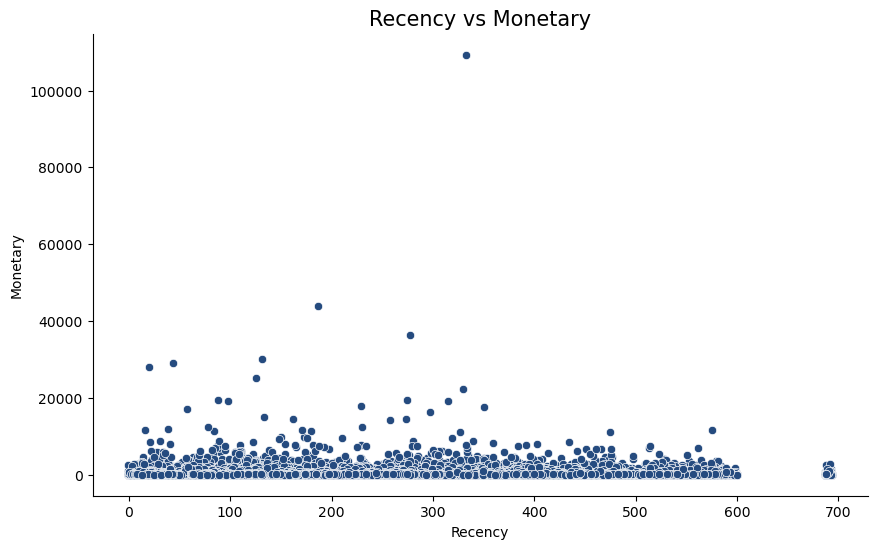

In [85]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x= 'Recency',y= 'Monetary', data=rfm_table)
plt.title('Recency vs Monetary', fontsize= 15)
sns.despine()

In [86]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x='Frequancy', y='Monetary', data=rfm_table)
plt.title('Frequancy vs Monetary', fontsize= 15)
sns.despine()

In [87]:
# Calculate RFM Score
rfm_table['rfm_score'] = 100 * rfm_table['r_score'].astype(int) + 10 * rfm_table['f_score'].astype(int)+ rfm_table['m_score'].astype(int)
rfm_table

Recency  Frequancy  Monetary r_score  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90       4   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19       3   
0000f46a3911fa3c0805444483337064      536          1     86.22       1   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62       2   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89       2   
...                                   ...        ...       ...     ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84       1   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58       2   
ffff371b4d645b6ecea244b27531430a      567          1    112.46       1   
ffff5962728ec6157033ef9805bacc48      118          1    133.69       3   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56       1   

                                 f_score m_score  rfm_score  
customer_unique_id                                           
0000366f3b9a7992bf8c76cfdf3221e2       1       3        413  
0000b849f77a49e4a4ce2b2a4ca5be3f       1       1        311  
0000f46a3911fa3c0805444483337064       1       2        112  
0000f6ccb0745a6a4b88665a16c9f078       1       1        211  
0004aac84e0df4da2b147fca70cf8255       1       3        213  
...                                  ...     ...        ...  
fffcf5a5ff07b0908bd4e2dbc735a684       4       4        144  
fffea47cd6d3cc0a88bd621562a9d061       4       2        242  
ffff371b4d645b6ecea244b27531430a       4       2        142  
ffff5962728ec6157033ef9805bacc48       4       3        343  
ffffd2657e2aad2907e67c3e9daecbeb       4       2        142  

[90986 rows x 7 columns]

In [88]:
# Cluster customers based on RFM Score
def customer_segmenation(rfm_score):
  
  if rfm_score == 444:
    return 'VIP'
  
  elif  rfm_score >= 433 and rfm_score < 444:
    return 'Very Loyal Customer'
  
  elif   rfm_score >=421 and rfm_score< 433:
    return 'Potential Loyalist Customer'
  
  elif rfm_score>=344 and rfm_score < 421:
    return 'New Customer'
  
  elif rfm_score>=323 and rfm_score<344:
    return 'Potential Customer'
  
  elif rfm_score>=224 and rfm_score<311:
    return 'At-Risk Customers' 
  
  else:
    return 'Lost customers'       
  
rfm_table['customer_segmentation'] = rfm_table['rfm_score'].apply(customer_segmenation)

rfm_table

Recency  Frequancy  Monetary r_score  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90       4   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19       3   
0000f46a3911fa3c0805444483337064      536          1     86.22       1   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62       2   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89       2   
...                                   ...        ...       ...     ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84       1   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58       2   
ffff371b4d645b6ecea244b27531430a      567          1    112.46       1   
ffff5962728ec6157033ef9805bacc48      118          1    133.69       3   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56       1   

                                 f_score m_score  rfm_score  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2       1       3        413   
0000b849f77a49e4a4ce2b2a4ca5be3f       1       1        311   
0000f46a3911fa3c0805444483337064       1       2        112   
0000f6ccb0745a6a4b88665a16c9f078       1       1        211   
0004aac84e0df4da2b147fca70cf8255       1       3        213   
...                                  ...     ...        ...   
fffcf5a5ff07b0908bd4e2dbc735a684       4       4        144   
fffea47cd6d3cc0a88bd621562a9d061       4       2        242   
ffff371b4d645b6ecea244b27531430a       4       2        142   
ffff5962728ec6157033ef9805bacc48       4       3        343   
ffffd2657e2aad2907e67c3e9daecbeb       4       2        142   

                                 customer_segmentation  
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2          New Customer  
0000b849f77a49e4a4ce2b2a4ca5be3f        Lost customers  
0000f46a3911fa3c0805444483337064        Lost customers  
0000f6ccb0745a6a4b88665a16c9f078        Lost customers  
0004aac84e0df4da2b147fca70cf8255        Lost customers  
...                                                ...  
fffcf5a5ff07b0908bd4e2dbc735a684        Lost customers  
fffea47cd6d3cc0a88bd621562a9d061     At-Risk Customers  
ffff371b4d645b6ecea244b27531430a        Lost customers  
ffff5962728ec6157033ef9805bacc48    Potential Customer  
ffffd2657e2aad2907e67c3e9daecbeb        Lost customers  

[90986 rows x 8 columns]

In [89]:
# Plot frquency of each segment
plt.figure(figsize=[10,6])
sns.barplot(x = rfm_table.customer_segmentation.value_counts().values, y= rfm_table.customer_segmentation.value_counts().index, palette= 'crest_r')
sns.despine()

In [90]:
# check outliers

rfm_table.describe()

Recency     Frequancy       Monetary     rfm_score
count  90986.000000  90986.000000   90986.000000  90986.000000
mean     235.125953      1.237036     211.896340    277.953872
std      152.238922      0.843602     632.183713    112.473220
min       -1.000000      1.000000       9.590000    111.000000
25%      112.000000      1.000000      63.680000    211.000000
50%      216.000000      1.000000     112.685000    311.000000
75%      344.000000      1.000000     201.990000    411.000000
max      694.000000     75.000000  109312.640000    444.000000

<AxesSubplot:xlabel='Recency'>

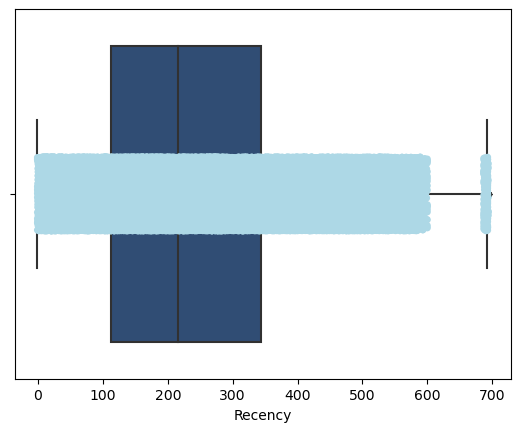

In [91]:
# Recency
sns.boxplot(x= rfm_table.Recency)
sns.stripplot(x = rfm_table.Recency, color= 'lightblue') 

In [92]:
# Frequency
sns.boxplot(x= rfm_table.Frequancy)
sns.stripplot(x = rfm_table.Frequancy, color= 'lightblue')

<AxesSubplot:xlabel='Frequancy'>

<AxesSubplot:xlabel='Monetary'>

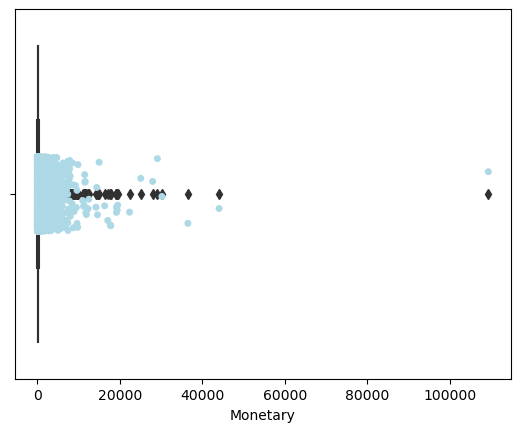

In [93]:
# Monetary 
sns.boxplot(x= rfm_table.Monetary)
sns.stripplot(x = rfm_table.Monetary, color= 'lightblue')

In [94]:
# Remove Extreme 5% of Outliers
print('Recency 5% Outliers Limits:', np.percentile(rfm_table.Recency, 5), np.percentile(rfm_table.Recency, 95))
print('Frequancy 5% Outliers Limits:', np.percentile(rfm_table.Frequancy, 5), np.percentile(rfm_table.Frequancy, 95))
print('Monetary 5% Outliers Limits:', np.percentile(rfm_table.Monetary, 5), np.percentile(rfm_table.Monetary, 95))

Recency 5% Outliers Limits: 22.0 517.0
Frequancy 5% Outliers Limits: 1.0 2.0
Monetary 5% Outliers Limits: 32.69 661.13


In [95]:
# Remove Outliers for Recency & Monetary (Extreme 5%)
for i in [0, 2]:

    outlier_indices = []
    col = rfm_table.columns[i]
    percentile_5 = np.percentile(rfm_table[col], 5)
    percentile_95 = np.percentile(rfm_table[col], 95)
    outlier_indices.append(rfm_table[(rfm_table[col] < percentile_5) | (rfm_table[col] > percentile_95)].index)

rfm_table.drop(outlier_indices[0][:], inplace= True)
rfm_table.reset_index(inplace= True, drop= True)

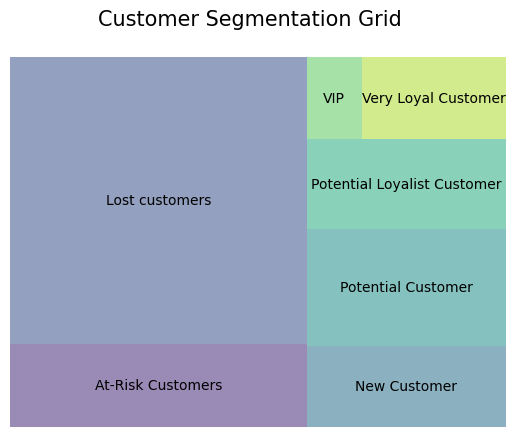

In [96]:
# Customer Segmentation Grid

import squarify
# Assuming Sizes and labels are defined
plt.rc('font', size=10)
Sizes = rfm_table.groupby('customer_segmentation')[['Monetary']].count()

# Choose a color palette
color_palette = sns.color_palette("viridis", n_colors=len(Sizes))

squarify.plot(sizes=Sizes.values, label=Sizes.index, color=color_palette, alpha=.55)
plt.suptitle("Customer Segmentation Grid", fontsize=15)
plt.axis('off')  # Turn off axis labels
plt.show()

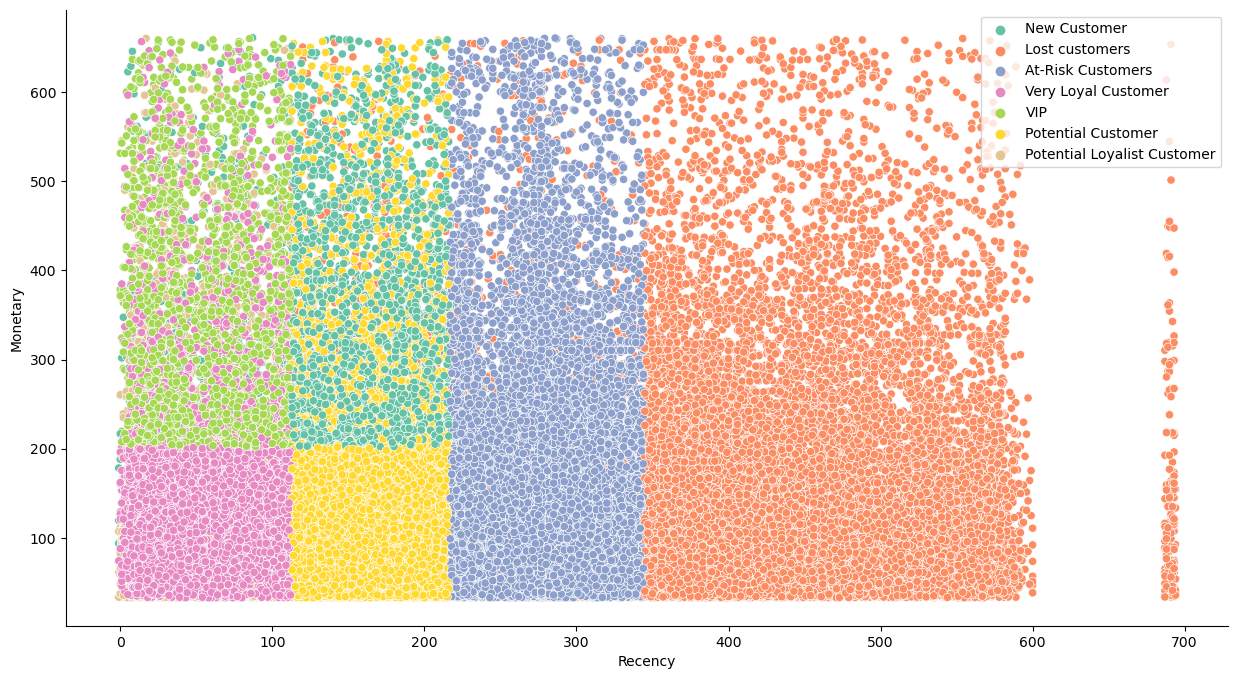

In [97]:
# Recency & Monetary Plot

plt.figure(figsize= [15, 8])
colors = sns.color_palette("Set2", n_colors=len(Sizes))
sns.scatterplot(x= rfm_table.Recency, y= rfm_table.Monetary, hue= rfm_table.customer_segmentation, palette= colors)
plt.legend(prop={'size':10})
sns.despine()

<AxesSubplot:ylabel='Density'>

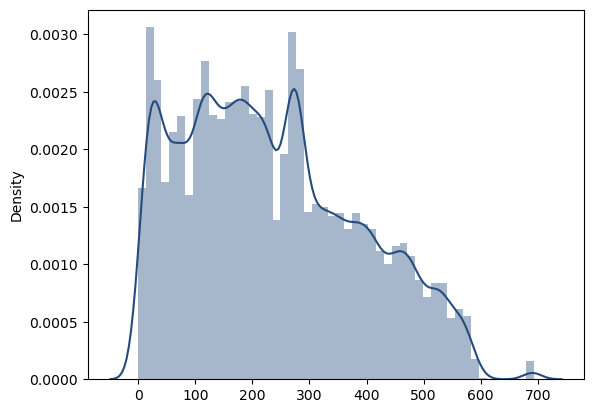

In [98]:
# Check Skeweness

# Recency
sns.distplot(x= rfm_table.Recency)

In [99]:
# Frequancy
sns.distplot(x= rfm_table.Frequancy)

<AxesSubplot:ylabel='Density'>

In [100]:
# Monetary
sns.distplot(x= rfm_table.Monetary)

<AxesSubplot:ylabel='Density'>

In [101]:
# Apply Log function to handle skeweness for Frequancy & Monetary
for i in ['Frequancy', 'Monetary']:
    rfm_table[i] = np.log10(rfm_table[i])

<AxesSubplot:ylabel='Density'>

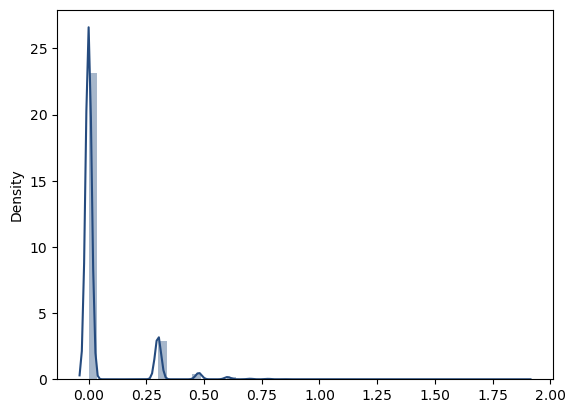

In [102]:
# Frequancy
sns.distplot(x= rfm_table.Frequancy)

In [103]:
# Monetary
sns.distplot(x= rfm_table.Monetary)

<AxesSubplot:ylabel='Density'>

In [104]:
# K-Mean clustering
df_cluster = df_segmentation[['freight_value', 'price', 'payment_value', 'payment_installments']]
df_cluster

freight_value   price  payment_value  payment_installments
0               21.88  124.99         146.87                     2
1               24.90  112.99         275.79                     1
2               24.90  112.99         275.79                     1
3               15.62  124.99         140.61                     7
4               30.59  106.99         137.58                    10
...               ...     ...            ...                   ...
112548          15.47  145.90         161.37                     1
112549          22.28   49.90          72.18                     3
112550          88.46  135.98         224.44                     6
112551          31.93  167.99         167.79                     5
112552          31.93  167.99          32.13                     1

[112553 rows x 4 columns]

In [105]:
df_cluster.columns

Index(['freight_value', 'price', 'payment_value', 'payment_installments'], dtype='object')

In [106]:
# Take sample from data (10k)
df_sample = df_cluster.sample(frac= 1, random_state= 42)[:10000]

In [107]:
# Save sample as CSV for deployment

df_sample.to_csv('Clustering_Sample.csv')

In [108]:
df_sample.describe()

freight_value         price  payment_value  payment_installments
count   10000.000000  10000.000000   10000.000000          10000.000000
mean       19.949810    118.104780     168.656074              2.922900
std        16.559843    171.380723     257.185052              2.742391
min         0.000000      2.990000       0.170000              1.000000
25%        13.040000     39.900000      61.000000              1.000000
50%        16.185000     74.990000     106.950000              2.000000
75%        21.150000    130.000000     188.205000              4.000000
max       375.280000   3105.000000   13664.080000             24.000000

In [109]:
# Drop freight values with zeros

df_sample.drop(df_sample[df_sample.freight_value == 0].index, inplace= True)
df_sample.reset_index(inplace= True, drop= True)

In [110]:
# Take copy for Pipeline

cluster_pipeline = df_sample.copy()

for i in ['freight_value', 'price', 'payment_value', 'payment_installments']:
    df_sample[i] = np.log10(df_sample[i])

In [111]:
print(df_sample.isnull().sum())
df_sample.describe()


freight_value           0
price                   0
payment_value           0
payment_installments    0
dtype: int64


freight_value        price  payment_value  payment_installments
count    9959.000000  9959.000000    9959.000000           9959.000000
mean        1.231186     1.871906       2.030808              0.309819
std         0.232803     0.397042       0.410000              0.351974
min        -1.301030     0.475671      -0.769551              0.000000
25%         1.116608     1.600973       1.785294              0.000000
50%         1.210051     1.875003       2.029262              0.301030
75%         1.325310     2.119172       2.274977              0.602060
max         2.574355     3.492062       4.135580              1.380211

In [112]:
# Remove rows with NaN values
df_sample = df_sample.dropna()

# Replace infinite values with a large finite value
df_sample.replace([np.inf, -np.inf], np.nan, inplace=True)
df_sample.fillna(1e10, inplace=True)  # Replace with a large finite value

print(df_sample.max())


freight_value           2.574355
price                   3.492062
payment_value           4.135580
payment_installments    1.380211
dtype: float64


In [113]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean= False)
data_scaled = sc.fit_transform(df_sample)

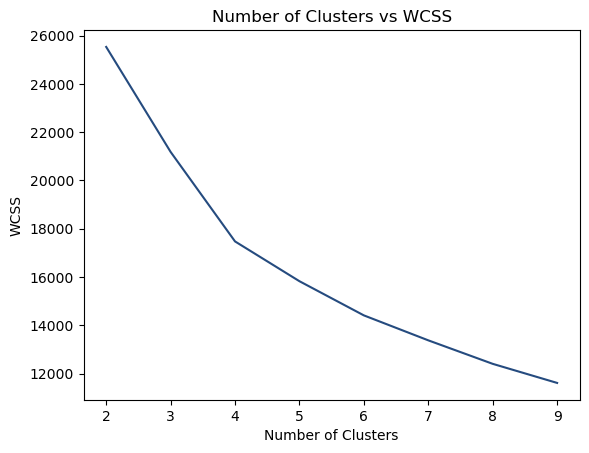

In [114]:
# Detecting number of clusters uning Elbow Method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
scores = []

for i in range(2, 10):
    kmean = KMeans(n_clusters=i)  
    y_pred_kmean = kmean.fit_predict(data_scaled)
    wcss.append(kmean.inertia_)
    scores.append(silhouette_score(data_scaled, y_pred_kmean))

plt.plot(range(2, 10), wcss)
plt.title('Number of Clusters vs WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Text(0, 0.5, 'silhouette_score')

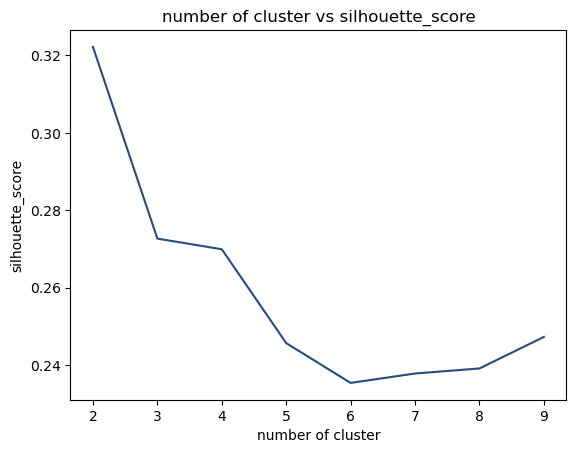

In [115]:
# Detecting number of clusters using Silhouete Score

plt.plot(range(2,10),scores)
plt.title('number of cluster vs silhouette_score')
plt.xlabel('number of cluster')
plt.ylabel('silhouette_score')

In [116]:
# Select number of clusters k= 2
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters= 2)
y_pred_kmean = kmean.fit_predict(data_scaled)


In [117]:
#  Count of each cluster
len(kmean.labels_[kmean.labels_ == 0]), len(kmean.labels_[kmean.labels_ == 1]), len(kmean.labels_[kmean.labels_ == 2])

(5638, 4321, 0)

In [118]:
# Take another sample of original cluster dataframe to assign kmeans labels
original_cluster_sample = df_cluster.sample(frac=1, random_state=42)[:len(y_pred_kmean)]

# Assign cluster label to original cluster sample
original_cluster_sample['cluster_label'] = y_pred_kmean
original_cluster_sample.head()

freight_value   price  payment_value  payment_installments  \
45354          21.08   85.00         106.08                    10   
82264          10.96   20.00          30.96                     1   
15888          11.64  144.99         156.63                     3   
93342           7.39   38.00          45.39                     1   
92366          13.53  169.90         183.43                     1   

       cluster_label  
45354              1  
82264              0  
15888              1  
93342              0  
92366              1

In [119]:
original_cluster_sample.groupby('cluster_label').describe().T

cluster_label                         0             1
freight_value        count  5638.000000   4321.000000
                     mean     20.213260     19.599544
                     std      17.293725     15.563639
                     min       0.000000      0.000000
                     25%      13.080000     12.930000
                     50%      16.330000     16.110000
                     75%      21.237500     20.960000
                     max     375.280000    375.280000
price                count  5638.000000   4321.000000
                     mean    116.958045    119.382752
                     std     170.453955    172.227160
                     min       2.990000      3.850000
                     25%      39.900000     39.900000
                     50%      74.900000     75.000000
                     75%     129.990000    134.900000
                     max    3105.000000   2799.650000
payment_value        count  5638.000000   4321.000000
                     mean    166.513954    171.424189
                     std     215.380939    303.475070
                     min       0.170000      0.270000
                     25%      60.992500     61.060000
                     50%     106.440000    107.800000
                     75%     187.347500    189.370000
                     max    3209.720000  13664.080000
payment_installments count  5638.000000   4321.000000
                     mean      2.943065      2.897015
                     std       2.735930      2.751901
                     min       1.000000      1.000000
                     25%       1.000000      1.000000
                     50%       2.000000      1.000000
                     75%       4.000000      4.000000
                     max      18.000000     24.000000

In [120]:
# Check the length of y_pred_kmean
print(len(y_pred_kmean))

# Check the length of the DataFrame
print(len(original_cluster_sample))


9959
9959


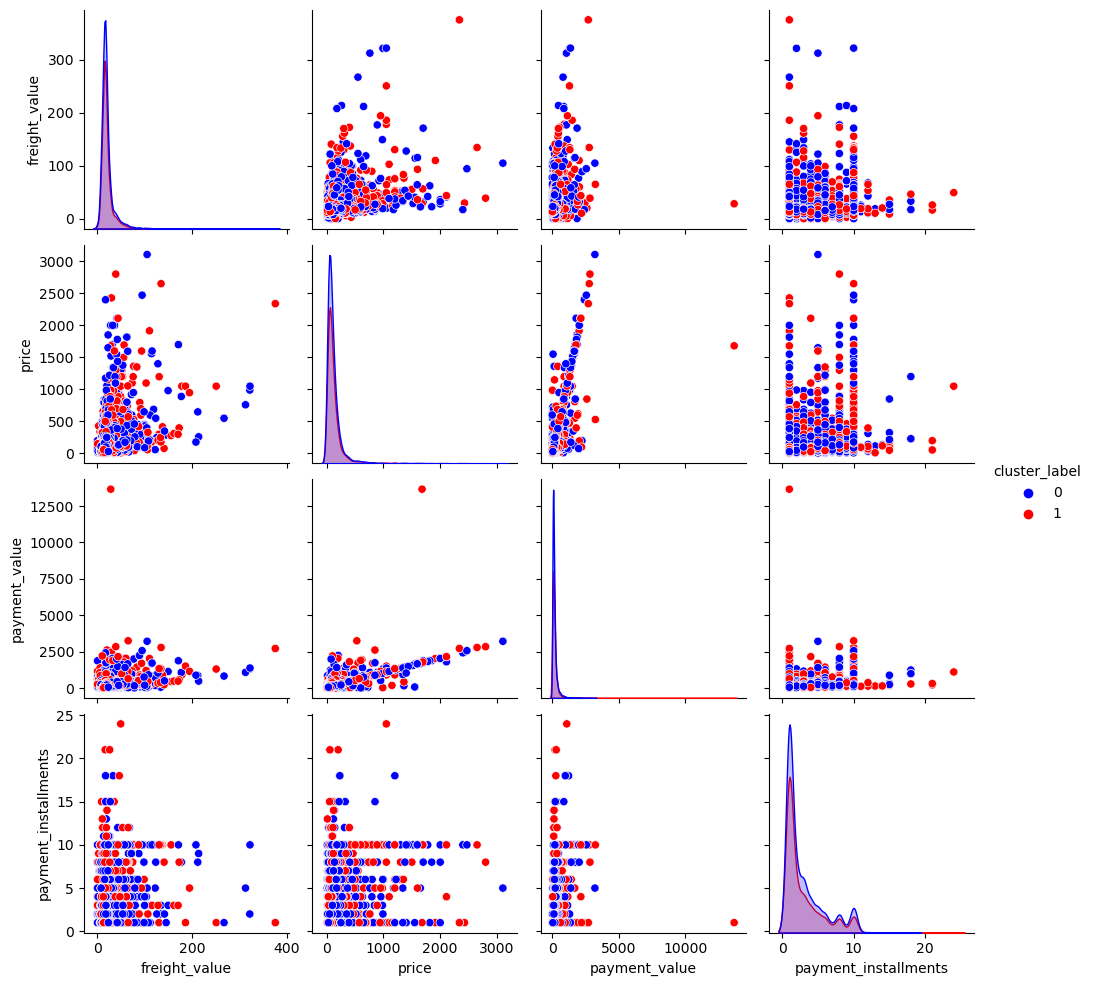

In [121]:
sns.pairplot(data= original_cluster_sample, hue= 'cluster_label', palette= ['blue', 'red'])

In [122]:
# show k-mean cluster

plt.figure(figsize=[10, 6])
plt.scatter(data_scaled[y_pred_kmean==0,0], data_scaled[y_pred_kmean==0,1], c = 'red',label = 'cluster1')
plt.scatter(data_scaled[y_pred_kmean==1,0], data_scaled[y_pred_kmean==1,1], c = 'green',label = 'cluster2')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], c='yellow', s= 20,label= 'Centroids')
plt.title('Customers Kmeans Clusters')
plt.legend()
sns.despine()

In [123]:
# Select number of clusters k= 3
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters= 3)
y_pred_kmean = kmean.fit_predict(data_scaled)


In [124]:
#  Count of each cluster
len(kmean.labels_[kmean.labels_ == 0]), len(kmean.labels_[kmean.labels_ == 1]), len(kmean.labels_[kmean.labels_ == 2])

(4155, 3049, 2755)

In [125]:
# Take another sample of original cluster dataframe to assign kmeans labels
original_cluster_sample = df_cluster.sample(frac=1, random_state=42)[:len(y_pred_kmean)]

# Assign cluster label to original cluster sample
original_cluster_sample['cluster_label'] = y_pred_kmean
original_cluster_sample.head()

freight_value   price  payment_value  payment_installments  \
45354          21.08   85.00         106.08                    10   
82264          10.96   20.00          30.96                     1   
15888          11.64  144.99         156.63                     3   
93342           7.39   38.00          45.39                     1   
92366          13.53  169.90         183.43                     1   

       cluster_label  
45354              1  
82264              0  
15888              1  
93342              0  
92366              2

In [126]:
original_cluster_sample.groupby('cluster_label').describe().T

cluster_label                         0             1            2
freight_value        count  4155.000000   3049.000000  2755.000000
                     mean     20.382816     19.758419    19.498356
                     std      18.171962     16.430093    13.966805
                     min       0.000000      0.000000     0.000000
                     25%      13.110000     12.940000    12.980000
                     50%      16.420000     16.110000    16.140000
                     75%      21.255000     20.820000    21.150000
                     max     375.280000    375.280000   250.570000
price                count  4155.000000   3049.000000  2755.000000
                     mean    118.514585    120.170144   114.858606
                     std     179.251514    179.385653   148.017728
                     min       2.990000      3.850000     5.200000
                     25%      39.900000     39.900000    39.990000
                     50%      74.800000     73.350000    77.990000
                     75%     129.990000    130.000000   137.950000
                     max    3105.000000   2799.650000  2428.000000
payment_value        count  4155.000000   3049.000000  2755.000000
                     mean    167.942010    171.506425   166.536279
                     std     226.061850    329.807126   204.833215
                     min       0.170000      0.240000     0.220000
                     25%      60.000000     61.770000    61.740000
                     50%     105.280000    106.670000   110.550000
                     75%     185.090000    188.520000   191.970000
                     max    3209.720000  13664.080000  3242.840000
payment_installments count  4155.000000   3049.000000  2755.000000
                     mean      2.927076      2.896359     2.946642
                     std       2.723005      2.718246     2.799857
                     min       1.000000      1.000000     1.000000
                     25%       1.000000      1.000000     1.000000
                     50%       2.000000      1.000000     2.000000
                     75%       4.000000      4.000000     4.000000
                     max      18.000000     21.000000    24.000000

In [127]:
# Check the length of y_pred_kmean
print(len(y_pred_kmean))

# Check the length of the DataFrame
print(len(original_cluster_sample))


9959
9959


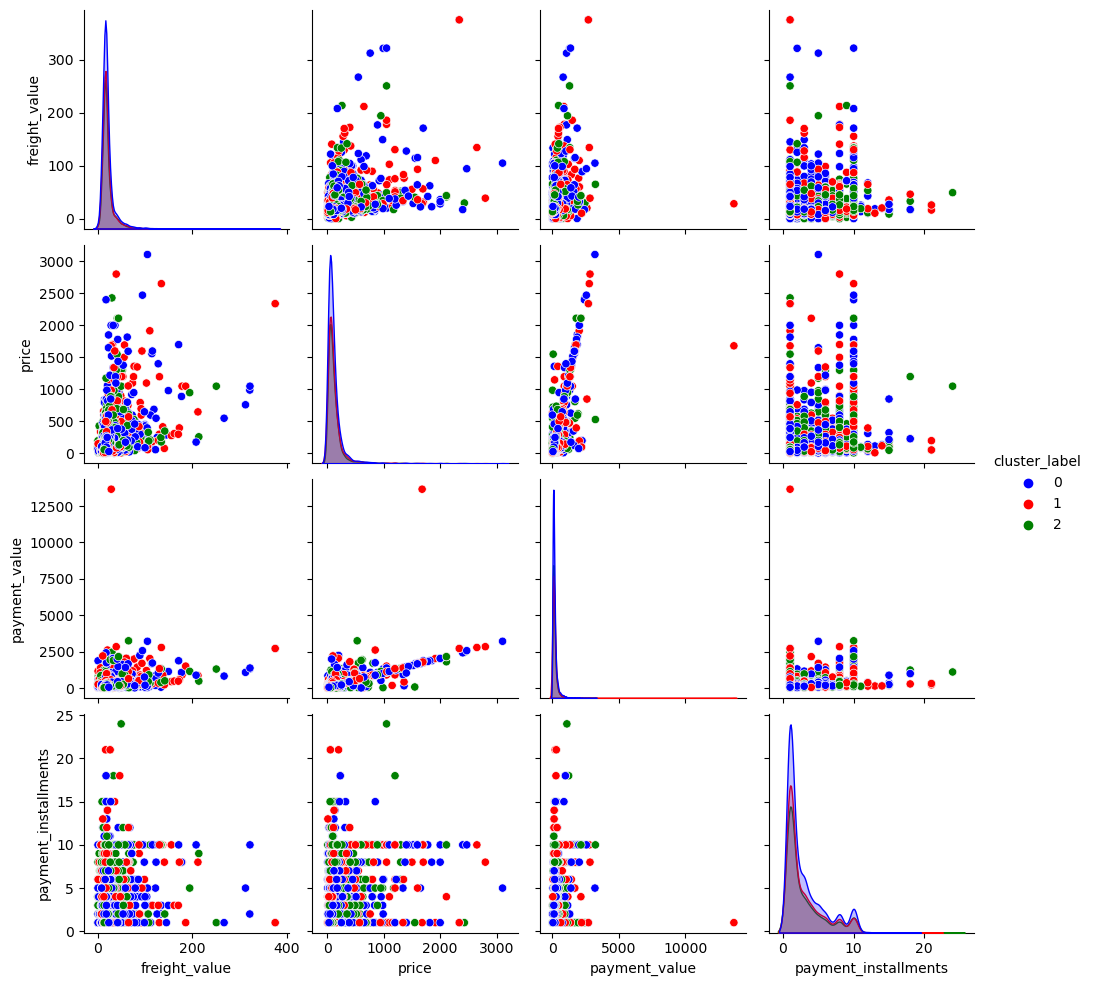

In [128]:
sns.pairplot(data= original_cluster_sample, hue= 'cluster_label', palette= ['blue', 'red','green'])

In [129]:
plt.figure(figsize=[10, 6])
plt.scatter(data_scaled[y_pred_kmean==0,0], data_scaled[y_pred_kmean==0,1], c = 'red',label = 'cluster1')
plt.scatter(data_scaled[y_pred_kmean==1,0], data_scaled[y_pred_kmean==1,1], c = 'green',label = 'cluster2')
plt.scatter(data_scaled[y_pred_kmean==2,0], data_scaled[y_pred_kmean==2,1], c = 'blue',label = 'cluster3')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], c='yellow', s= 20,label= 'Centroids')
plt.title('Customers Kmeans Clusters')
plt.legend()
sns.despine()

In [130]:
# Select number of clusters k= 4
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters= 4)
y_pred_kmean = kmean.fit_predict(data_scaled)


In [131]:
#  Count of each cluster
len(kmean.labels_[kmean.labels_ == 0]), len(kmean.labels_[kmean.labels_ == 1]), len(kmean.labels_[kmean.labels_ == 2])

(3116, 2539, 1310)

In [132]:
# Take another sample of original cluster dataframe to assign kmeans labels
original_cluster_sample = df_cluster.sample(frac=1, random_state=42)[:len(y_pred_kmean)]

# Assign cluster label to original cluster sample
original_cluster_sample['cluster_label'] = y_pred_kmean
original_cluster_sample.head()

freight_value   price  payment_value  payment_installments  \
45354          21.08   85.00         106.08                    10   
82264          10.96   20.00          30.96                     1   
15888          11.64  144.99         156.63                     3   
93342           7.39   38.00          45.39                     1   
92366          13.53  169.90         183.43                     1   

       cluster_label  
45354              1  
82264              3  
15888              1  
93342              3  
92366              0

In [133]:
original_cluster_sample.groupby('cluster_label').describe().T

cluster_label                         0             1            2  \
freight_value        count  3116.000000   2539.000000  1310.000000   
                     mean     19.445934     20.041631    20.100924   
                     std      14.751237     17.532952    14.333549   
                     min       0.000000      0.000000     0.000000   
                     25%      12.955000     13.010000    13.092500   
                     50%      16.175000     16.110000    16.285000   
                     75%      20.945000     20.680000    22.060000   
                     max     312.410000    375.280000   185.730000   
price                count  3116.000000   2539.000000  1310.000000   
                     mean    114.877635    118.810748   121.625137   
                     std     145.561669    191.275484   164.956746   
                     min       5.200000      3.850000     7.900000   
                     25%      41.987500     39.140000    42.917500   
                     50%      78.000000     72.000000    75.995000   
                     75%     136.990000    129.900000   139.900000   
                     max    2428.000000   3105.000000  2110.000000   
payment_value        count  3116.000000   2539.000000  1310.000000   
                     mean    165.686101    174.341256   170.609809   
                     std     197.943987    357.458486   224.337564   
                     min       0.170000      0.240000     0.270000   
                     25%      62.910000     60.885000    61.790000   
                     50%     110.125000    105.860000   108.725000   
                     75%     192.335000    188.400000   191.572500   
                     max    3242.840000  13664.080000  2607.090000   
payment_installments count  3116.000000   2539.000000  1310.000000   
                     mean      2.978177      2.905868     2.906107   
                     std       2.788564      2.743033     2.730784   
                     min       1.000000      1.000000     1.000000   
                     25%       1.000000      1.000000     1.000000   
                     50%       2.000000      1.000000     1.000000   
                     75%       4.000000      4.000000     4.000000   
                     max      24.000000     21.000000    15.000000   

cluster_label                         3  
freight_value        count  2994.000000  
                     mean     20.320825  
                     std      18.324514  
                     min       0.000000  
                     25%      13.142500  
                     50%      16.320000  
                     75%      21.315000  
                     max     375.280000  
price                count  2994.000000  
                     mean    119.009419  
                     std     180.402261  
                     min       2.990000  
                     25%      38.750000  
                     50%      71.150000  
                     75%     129.900000  
                     max    2470.500000  
payment_value        count  2994.000000  
                     mean    166.032198  
                     std     221.656637  
                     min       0.260000  
                     25%      58.507500  
                     50%     104.700000  
                     75%     181.542500  
                     max    2713.360000  
payment_installments count  2994.000000  
                     mean      2.887776  
                     std       2.700082  
                     min       1.000000  
                     25%       1.000000  
                     50%       2.000000  
                     75%       4.000000  
                     max      18.000000

In [134]:
# Check the length of y_pred_kmean
print(len(y_pred_kmean))

# Check the length of the DataFrame
print(len(original_cluster_sample))


9959
9959


In [135]:
sns.pairplot(data= original_cluster_sample, hue= 'cluster_label', palette= ['blue', 'red','green','yellow'])

In [136]:
plt.figure(figsize=[10, 6])
plt.scatter(data_scaled[y_pred_kmean==0,0], data_scaled[y_pred_kmean==0,1], c = 'red',label = 'cluster1')
plt.scatter(data_scaled[y_pred_kmean==1,0], data_scaled[y_pred_kmean==1,1], c = 'green',label = 'cluster2')
plt.scatter(data_scaled[y_pred_kmean==2,0], data_scaled[y_pred_kmean==2,1], c = 'blue',label = 'cluster3')
plt.scatter(data_scaled[y_pred_kmean==2,0], data_scaled[y_pred_kmean==2,1], c = 'yellow',label = 'cluster4')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], c='black', s= 20,label= 'Centroids')
plt.title('Customers Kmeans Clusters')
plt.legend()
sns.despine()

In [137]:
# define the relationship between customer location and behavioural customer segmentation
# Example: Most of the loss customers come from which location? Which state has the most vip customer?

# Assuming 'zip_code' is the column containing 5-digit zip codes
rfm_location_table = df_segmentation.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (datetime.strptime(str(max_trans_date), '%Y-%m-%d') - x.max()).days,
    'order_id': lambda x: len(x),
    'payment_value': lambda x: sum(x),
    'customer_zip_code_prefix': 'first'  
})
rfm_location_table

In [145]:
# Rename columns for clarity
rfm_location_table.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary',
    'customer_zip_code_prefix': 'Location'
}, inplace=True)
rfm_location_table

Recency  Frequency  Monetary  Location  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90      7787   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19      6053   
0000f46a3911fa3c0805444483337064      536          1     86.22     88115   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62     66812   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89     18040   
...                                   ...        ...       ...       ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84     55250   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58     44054   
ffff371b4d645b6ecea244b27531430a      567          1    112.46     78552   
ffff5962728ec6157033ef9805bacc48      118          1    133.69     29460   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56     83608   

                                 r_score f_score m_score  rfm_score  \
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2       4       1       3        413   
0000b849f77a49e4a4ce2b2a4ca5be3f       3       1       1        311   
0000f46a3911fa3c0805444483337064       1       1       2        112   
0000f6ccb0745a6a4b88665a16c9f078       2       1       1        211   
0004aac84e0df4da2b147fca70cf8255       2       1       3        213   
...                                  ...     ...     ...        ...   
fffcf5a5ff07b0908bd4e2dbc735a684       1       4       4        144   
fffea47cd6d3cc0a88bd621562a9d061       2       4       2        242   
ffff371b4d645b6ecea244b27531430a       1       4       2        142   
ffff5962728ec6157033ef9805bacc48       3       4       3        343   
ffffd2657e2aad2907e67c3e9daecbeb       1       4       2        142   

                                 customer_segmentation  
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2          New Customer  
0000b849f77a49e4a4ce2b2a4ca5be3f        Lost customers  
0000f46a3911fa3c0805444483337064        Lost customers  
0000f6ccb0745a6a4b88665a16c9f078        Lost customers  
0004aac84e0df4da2b147fca70cf8255        Lost customers  
...                                                ...  
fffcf5a5ff07b0908bd4e2dbc735a684        Lost customers  
fffea47cd6d3cc0a88bd621562a9d061     At-Risk Customers  
ffff371b4d645b6ecea244b27531430a        Lost customers  
ffff5962728ec6157033ef9805bacc48    Potential Customer  
ffffd2657e2aad2907e67c3e9daecbeb        Lost customers  

[90986 rows x 9 columns]

In [146]:
# Create Recency, Frequancy and Monetary scores
rfm_location_table['r_score'] = pd.qcut(rfm_location_table['Recency'], 4, ['4', '3', '2', '1'])
rfm_location_table['f_score'] = pd.qcut(rfm_location_table['Frequency'].rank(method='first'), 4, ['1', '2', '3', '4'])
rfm_location_table['m_score'] = pd.qcut(rfm_location_table['Monetary'], 4, ['1', '2', '3', '4'])
rfm_location_table

Recency  Frequency  Monetary  Location  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90      7787   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19      6053   
0000f46a3911fa3c0805444483337064      536          1     86.22     88115   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62     66812   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89     18040   
...                                   ...        ...       ...       ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84     55250   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58     44054   
ffff371b4d645b6ecea244b27531430a      567          1    112.46     78552   
ffff5962728ec6157033ef9805bacc48      118          1    133.69     29460   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56     83608   

                                 r_score f_score m_score  rfm_score  \
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2       4       1       3        413   
0000b849f77a49e4a4ce2b2a4ca5be3f       3       1       1        311   
0000f46a3911fa3c0805444483337064       1       1       2        112   
0000f6ccb0745a6a4b88665a16c9f078       2       1       1        211   
0004aac84e0df4da2b147fca70cf8255       2       1       3        213   
...                                  ...     ...     ...        ...   
fffcf5a5ff07b0908bd4e2dbc735a684       1       4       4        144   
fffea47cd6d3cc0a88bd621562a9d061       2       4       2        242   
ffff371b4d645b6ecea244b27531430a       1       4       2        142   
ffff5962728ec6157033ef9805bacc48       3       4       3        343   
ffffd2657e2aad2907e67c3e9daecbeb       1       4       2        142   

                                 customer_segmentation  
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2          New Customer  
0000b849f77a49e4a4ce2b2a4ca5be3f        Lost customers  
0000f46a3911fa3c0805444483337064        Lost customers  
0000f6ccb0745a6a4b88665a16c9f078        Lost customers  
0004aac84e0df4da2b147fca70cf8255        Lost customers  
...                                                ...  
fffcf5a5ff07b0908bd4e2dbc735a684        Lost customers  
fffea47cd6d3cc0a88bd621562a9d061     At-Risk Customers  
ffff371b4d645b6ecea244b27531430a        Lost customers  
ffff5962728ec6157033ef9805bacc48    Potential Customer  
ffffd2657e2aad2907e67c3e9daecbeb        Lost customers  

[90986 rows x 9 columns]

In [147]:
# Calculate RFM Score
rfm_location_table['rfm_score'] = 100 * rfm_location_table['r_score'].astype(int) + 10 * rfm_location_table['f_score'].astype(int)+ rfm_location_table['m_score'].astype(int)
rfm_location_table

Recency  Frequency  Monetary  Location  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90      7787   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19      6053   
0000f46a3911fa3c0805444483337064      536          1     86.22     88115   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62     66812   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89     18040   
...                                   ...        ...       ...       ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84     55250   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58     44054   
ffff371b4d645b6ecea244b27531430a      567          1    112.46     78552   
ffff5962728ec6157033ef9805bacc48      118          1    133.69     29460   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56     83608   

                                 r_score f_score m_score  rfm_score  \
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2       4       1       3        413   
0000b849f77a49e4a4ce2b2a4ca5be3f       3       1       1        311   
0000f46a3911fa3c0805444483337064       1       1       2        112   
0000f6ccb0745a6a4b88665a16c9f078       2       1       1        211   
0004aac84e0df4da2b147fca70cf8255       2       1       3        213   
...                                  ...     ...     ...        ...   
fffcf5a5ff07b0908bd4e2dbc735a684       1       4       4        144   
fffea47cd6d3cc0a88bd621562a9d061       2       4       2        242   
ffff371b4d645b6ecea244b27531430a       1       4       2        142   
ffff5962728ec6157033ef9805bacc48       3       4       3        343   
ffffd2657e2aad2907e67c3e9daecbeb       1       4       2        142   

                                 customer_segmentation  
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2          New Customer  
0000b849f77a49e4a4ce2b2a4ca5be3f        Lost customers  
0000f46a3911fa3c0805444483337064        Lost customers  
0000f6ccb0745a6a4b88665a16c9f078        Lost customers  
0004aac84e0df4da2b147fca70cf8255        Lost customers  
...                                                ...  
fffcf5a5ff07b0908bd4e2dbc735a684        Lost customers  
fffea47cd6d3cc0a88bd621562a9d061     At-Risk Customers  
ffff371b4d645b6ecea244b27531430a        Lost customers  
ffff5962728ec6157033ef9805bacc48    Potential Customer  
ffffd2657e2aad2907e67c3e9daecbeb        Lost customers  

[90986 rows x 9 columns]

In [152]:
rfm_location_table['customer_segmentation'] = rfm_location_table['rfm_score'].apply(customer_segmenation)
rfm_location_table

Recency  Frequency  Monetary  Location  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90      7787   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19      6053   
0000f46a3911fa3c0805444483337064      536          1     86.22     88115   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62     66812   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89     18040   
...                                   ...        ...       ...       ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84     55250   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58     44054   
ffff371b4d645b6ecea244b27531430a      567          1    112.46     78552   
ffff5962728ec6157033ef9805bacc48      118          1    133.69     29460   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56     83608   

                                 r_score f_score m_score  rfm_score  \
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2       4       1       3        413   
0000b849f77a49e4a4ce2b2a4ca5be3f       3       1       1        311   
0000f46a3911fa3c0805444483337064       1       1       2        112   
0000f6ccb0745a6a4b88665a16c9f078       2       1       1        211   
0004aac84e0df4da2b147fca70cf8255       2       1       3        213   
...                                  ...     ...     ...        ...   
fffcf5a5ff07b0908bd4e2dbc735a684       1       4       4        144   
fffea47cd6d3cc0a88bd621562a9d061       2       4       2        242   
ffff371b4d645b6ecea244b27531430a       1       4       2        142   
ffff5962728ec6157033ef9805bacc48       3       4       3        343   
ffffd2657e2aad2907e67c3e9daecbeb       1       4       2        142   

                                 customer_segmentation  
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2          New Customer  
0000b849f77a49e4a4ce2b2a4ca5be3f        Lost customers  
0000f46a3911fa3c0805444483337064        Lost customers  
0000f6ccb0745a6a4b88665a16c9f078        Lost customers  
0004aac84e0df4da2b147fca70cf8255        Lost customers  
...                                                ...  
fffcf5a5ff07b0908bd4e2dbc735a684        Lost customers  
fffea47cd6d3cc0a88bd621562a9d061     At-Risk Customers  
ffff371b4d645b6ecea244b27531430a        Lost customers  
ffff5962728ec6157033ef9805bacc48    Potential Customer  
ffffd2657e2aad2907e67c3e9daecbeb        Lost customers  

[90986 rows x 9 columns]

In [158]:
segment_location_analysis = map_data.groupby(['customer_segmentation', 'Location']).size().unstack()
segment_location_analysis


# I think not neccessary 

Location                     1003.0   1004.0   1005.0   1006.0   1007.0   \
customer_segmentation                                                      
At-Risk Customers                NaN      NaN      NaN      NaN      NaN   
Lost customers                   NaN     22.0     25.0      9.0     26.0   
New Customer                    17.0      NaN      NaN      NaN     26.0   
Potential Customer               NaN      NaN     25.0      9.0      NaN   
Potential Loyalist Customer      NaN     22.0     50.0      NaN     52.0   
VIP                              NaN      NaN     25.0      NaN      NaN   
Very Loyal Customer              NaN      NaN      NaN      NaN      NaN   

Location                     1008.0   1009.0   1011.0   1012.0   1013.0   ...  \
customer_segmentation                                                     ...   
At-Risk Customers                NaN     41.0      NaN      NaN      NaN  ...   
Lost customers                  16.0     82.0      NaN     34.0     20.0  ...   
New Customer                     NaN      NaN     42.0      NaN      NaN  ...   
Potential Customer               NaN     41.0      NaN      NaN     20.0  ...   
Potential Loyalist Customer     16.0     41.0      NaN      NaN     20.0  ...   
VIP                              NaN     41.0      NaN      NaN      NaN  ...   
Very Loyal Customer             16.0      NaN     42.0      NaN      NaN  ...   

Location                     99920.0  99925.0  99930.0  99940.0  99950.0  \
customer_segmentation                                                      
At-Risk Customers                NaN      NaN      NaN      NaN      NaN   
Lost customers                   8.0      NaN     96.0     37.0    765.0   
New Customer                     NaN      NaN     32.0      NaN      NaN   
Potential Customer               NaN      9.0     32.0     37.0    306.0   
Potential Loyalist Customer      NaN      NaN      NaN      NaN      NaN   
VIP                              NaN      NaN      NaN      NaN    153.0   
Very Loyal Customer              NaN      NaN      NaN      NaN    153.0   

Location                     99955.0  99960.0  99965.0  99970.0  99980.0  
customer_segmentation                                                     
At-Risk Customers                NaN      NaN      6.0      NaN      NaN  
Lost customers                  36.0      5.0      6.0     21.0     26.0  
New Customer                     NaN      NaN      NaN      NaN      NaN  
Potential Customer               NaN      NaN      NaN      NaN      NaN  
Potential Loyalist Customer      NaN      NaN      NaN      NaN      NaN  
VIP                              NaN      NaN      NaN      NaN     26.0  
Very Loyal Customer              NaN      NaN      NaN      NaN      NaN  

[7 rows x 14380 columns]

In [155]:
# Merge the world map data with the customer segment analysis
map_data = pd.merge(geolocation, rfm_location_table, left_on='geolocation_zip_code_prefix', right_on='Location', how='left')
map_data

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                                1037       -23.545621       -46.639292   
1                                1037       -23.545621       -46.639292   
2                                1037       -23.545621       -46.639292   
3                                1046       -23.546081       -46.644820   
4                                1046       -23.546081       -46.644820   
...                               ...              ...              ...   
13745501                        99950       -28.070104       -52.018658   
13745502                        99950       -28.070104       -52.018658   
13745503                        99950       -28.070104       -52.018658   
13745504                        99950       -28.070104       -52.018658   
13745505                        99950       -28.070104       -52.018658   

         geolocation_city  geolocation_state  Recency  Frequency  Monetary  \
0               São Paulo          São Paulo    112.0        2.0   1621.04   
1               São Paulo          São Paulo     11.0        1.0     33.34   
2               São Paulo          São Paulo    104.0        1.0    136.67   
3               São Paulo          São Paulo    532.0        1.0    114.77   
4               São Paulo          São Paulo     49.0        1.0     78.64   
...                   ...                ...      ...        ...       ...   
13745501         tapejara  Rio Grande do Sul    183.0        1.0     92.19   
13745502         tapejara  Rio Grande do Sul    421.0        1.0    116.94   
13745503         tapejara  Rio Grande do Sul    104.0        1.0    299.76   
13745504         tapejara  Rio Grande do Sul    474.0        1.0    145.66   
13745505         tapejara  Rio Grande do Sul     83.0        1.0     86.75   

          Location r_score f_score m_score  rfm_score  \
0           1037.0       4       4       4      444.0   
1           1037.0       4       1       1      411.0   
2           1037.0       4       2       3      423.0   
3           1046.0       1       1       3      113.0   
4           1046.0       4       1       2      412.0   
...            ...     ...     ...     ...        ...   
13745501   99950.0       3       3       2      332.0   
13745502   99950.0       1       3       3      133.0   
13745503   99950.0       4       4       4      444.0   
13745504   99950.0       1       4       3      143.0   
13745505   99950.0       4       4       2      442.0   

                customer_segmentation  
0                                 VIP  
1                        New Customer  
2         Potential Loyalist Customer  
3                      Lost customers  
4                        New Customer  
...                               ...  
13745501           Potential Customer  
13745502               Lost customers  
13745503                          VIP  
13745504               Lost customers  
13745505          Very Loyal Customer  

[13745506 rows x 14 columns]

In [176]:
import cartopy.crs as ccrs
import geopandas as gpd
# libraries to plot graphs on world map

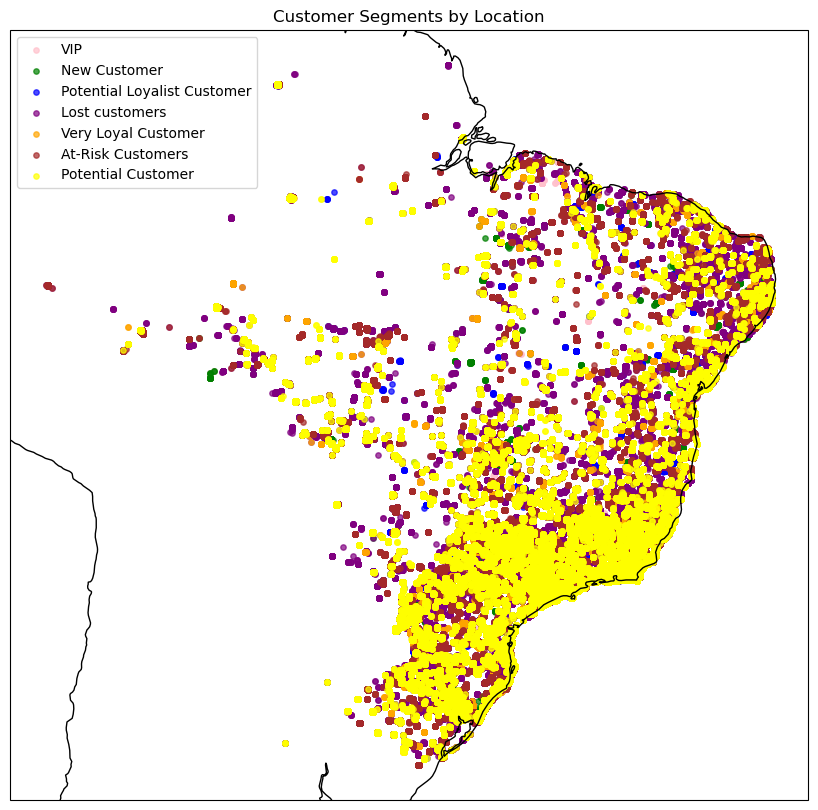

In [182]:
# Create a GeoDataFrame for spatial analysis
geometry = [Point(xy) for xy in zip(map_data['geolocation_lng'], map_data['geolocation_lat'])]
gdf = gpd.GeoDataFrame(map_data, geometry=geometry)

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines(resolution='50m')

# Define colors for each customer segment
segment_colors = {
    'VIP': 'pink',
    'Very Loyal Customer': 'orange',
    'Potential Loyalist Customer': 'blue',
    'New Customer': 'green',
    'Potential Customer': 'yellow',
    'At-Risk Customers': 'brown',
    'Lost customers': 'purple'
}

# Scatter plot with different colors for each customer segment
for segment in map_data['customer_segmentation'].unique():
    segment_data = gdf[gdf['customer_segmentation'] == segment]
    if not segment_data.empty:
        ax.scatter(
            segment_data['geolocation_lng'],
            segment_data['geolocation_lat'],
            label=segment,
            alpha=0.7,
            s=15,
            color=segment_colors.get(segment, 'black')  # Use black if color not defined
        )
        
# Set plot title
plt.title('Customer Segments by Location')
plt.legend()

# Display the plot
plt.show()